<a href="https://www.kaggle.com/mickaelnarboni/seattle-co2-totalghgemissions-2016?scriptVersionId=86660406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mathematical Considerations

In order to define the best predictive model in the frame of our project, we'll use some scoring metrics for each model.
We are using **regression** models to predict our output because we work with continuous data.

The **Mean Squared Error**, **Mean Absolute error**, **Root Mean Squared Error**, and **R-Squared or Coefficient of determination** metrics are used to evaluate the performance of the model in regression analysis.

**Mean Absolute Error** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

<div style="width:100%;text-align: center;">
<img align=middle src="https://i.imgur.com/BmBC8VW.jpg" width="350"/>
    
 
**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

<div style="width:100%;text-align: center;">
<img align=middle src="https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/11/Differences-between-MSE-and-RMSE-1-i2tutorials.jpg" width="330"/>
    
 
**Root Mean Squared Error** is the **square root of Mean Squared error**. It measures the standard deviation of residuals.
 
<div style="width:100%;text-align: center;">
<img align=middle src="https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png" width="300"/>
   

**The coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.
    
<div style="width:100%;text-align: center;">
<img align=middle src="https://miro.medium.com/max/1400/0*8rFYfZJfJZpW2cEV.png" width="440"/>

# Set up Environment

We import all the relevant librairies to display our models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # ignore the warnings about file size
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
from time import process_time

# calling our libraries for our models

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from math import sqrt
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.model_selection import validation_curve
from sklearn import preprocessing
from sklearn.dummy import DummyRegressor


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sea-building-energy-benchmarking/clean_p3 (1).csv
/kaggle/input/sea-building-energy-benchmarking/archive/2016-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/archive/socrata_metadata_2016-building-energy-benchmarking.json
/kaggle/input/sea-building-energy-benchmarking/archive/2015-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/archive/socrata_metadata_2015-building-energy-benchmarking.json


In [2]:
import pandas as pd
# set option to be able to get each column and row of our dataframes
pd.set_option("display.max_columns", None)
data = pd.read_csv('../input/sea-building-energy-benchmarking/clean_p3 (1).csv',sep='\t', low_memory=False, index_col=[0])
data.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3353,50090,2016,Multifamily MR (5-9),Mid-Rise Multifamily,131910 - LIV Seattle,4717 Brooklyn Ave NE,Seattle,WA,98105.0,8817400110,4,NORTHEAST,47.66366,-122.31450,2015,1.0,7,63825,4850,58975,Multifamily Housing,Multifamily Housing,71241.0,99.0,32.799999,35.000000,78.599998,85.400002,2.337651e+06,2.689826,0.0,4.407752e+05,1503925.0,8337.259766,833726.0,False,Compliant,54.76,0.86
3354,50092,2016,Multifamily MR (5-9),Residence Hall,Terry Hall & Maple Hall,1101 NE Campus Pkwy,Seattle,WA,98195.0,1142002345,4,NORTHEAST,47.65577,-122.31702,2015,1.0,7,325000,0,325000,Residence Hall/Dormitory,Residence Hall/Dormitory,325000.0,69.0,50.700001,53.599998,109.900002,113.000000,1.646749e+07,2.813833,0.0,2.583406e+06,8814581.0,76529.031250,7652903.0,False,Compliant,467.90,1.44
3355,50093,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Raven Terrace,820 Yesler Way,Seattle,WA,98104.0,9822000080,3,EAST,47.60189,-122.32182,2015,1.0,6,86045,8908,77137,"Multifamily Housing, Other - Public Services, ...",Multifamily Housing,78359.0,84.0,27.100000,27.100000,85.099998,85.099998,2.161240e+06,2.680075,0.0,6.334232e+05,2161240.0,0.000000,0.0,False,Compliant,15.07,0.18
3357,50095,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Broadstone Sky,4745 40th Ave SW,Seattle,WA,98116.0,7579200395,1,SOUTHWEST,47.55976,-122.38320,2015,1.0,7,208136,58818,149318,"Multifamily Housing, Parking",Multifamily Housing,168221.0,100.0,21.100000,21.100000,46.900002,46.900002,3.552185e+06,2.713573,0.0,5.828756e+05,1988772.0,15634.129880,1563413.0,False,Compliant,96.90,0.47
3358,50098,2016,Multifamily LR (1-4),Low-Rise Multifamily,1806,1806 23rd Avenue,Seattle,WA,98122.0,1407300010,3,CENTRAL,47.61791,-122.30230,2014,1.0,4,20246,2580,17666,Multifamily Housing,Multifamily Housing,17666.0,99.0,44.700001,45.000000,106.099998,106.400002,7.898472e+05,2.609067,0.0,1.465200e+05,499926.0,2899.209961,289921.0,False,Compliant,18.88,0.93


# Convert Continuous Variables into Discrete Values

At the difference of LabelEncoder(), **OneHotEncoder()** does not create a hierarchy in the numerical values. In our case, we don't have hierarchy in our modalities, so we'll definitely use this class to convert the string into numerical values. 

We're going to use on the categorical variables that did interest us during the exploratory phase:

- BuildingType
- PrimaryPropertyType
- Neighborhood

In [3]:
enc = data[['BuildingType','PrimaryPropertyType','Neighborhood']]
data = data.drop(columns=['BuildingType','PrimaryPropertyType','Neighborhood'])

In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

# passing our categorical columns (label encoded values)

categorical_features = pd.DataFrame(encoder.fit_transform(enc))

# label the encoded columns with the features of the original variables

categorical_features.columns = encoder.get_feature_names(['BuildingType','PrimaryPropertType','Neighborhood'])

# merge with main dataframe

enc_data = data.join(categorical_features, how="inner")
enc_data

,OSEBuildingID,DataYear,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,1,2016,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,2.761569,2003882.00,1.156514e+06,3946027.0,12764.529300,1276453.0,False,Compliant,249.98,2.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2016,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,2.771009,0.00,9.504252e+05,3242851.0,51450.816410,5145082.0,False,Compliant,295.86,2.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2016,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,2.896946,21566554.00,1.451544e+07,49526664.0,14938.000000,1493800.0,False,Compliant,2089.28,2.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,2016,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,2.757081,2214446.25,8.115253e+05,2768924.0,18112.130860,1811213.0,False,Compliant,286.43,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2016,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,

# Features and Predictive Variable for CO2 Emissions

We import our features in a dataframe called X which will contain all the numerical (discrete) variables that do predict our predictive variable.

As predictive variable to predict the total CO2 emissions of a property in Seattle, we decide to pick *TotalGHGEmissions* that seems the most representative of our real case study, which means that the lower *TotalGHGEmissions* is, the lower the consumption of the building will be.

*TotalGHGEmissions* is contained in our y dataframe for predictions

In [5]:
# Create the dataframe that will contain all our features for modeling

X = pd.concat([enc_data.loc[:,'PropertyGFATotal':'PropertyGFABuilding(s)'],enc_data.loc[:,'LargestPropertyUseTypeGFA':'NaturalGas(kBtu)'],enc_data.loc[:,'GHGEmissionsIntensity':'Neighborhood_SOUTHWEST']],1).copy()
X = pd.DataFrame(X)
X.head()

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissionsIntensity,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,88434,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,2.761569,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,2.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103566,15064,88502,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,2.771009,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,2.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,956110,196718,759392,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,2.896946,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61320,0,61320,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,2.757081,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175580,62000,113580,123445.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,2.803384,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,2.88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y = enc_data.loc[:,'TotalGHGEmissions']
y = pd.DataFrame(y).astype('int32')

# Correlation Matrix

We re-insert our correlation matrix from our exploratory phase because we notice some overfitting between our test and training datasets while creating the models.

We're working on predicting the variable *TotalGHGEmissions* so we want to define a threshold by which we'll not take in consideration the variables in our X features to not give too many degrees of freedom to our models.

By observing the correlation matrix, we gather the variables that are correlated to our predictive variable with a correlation above 40%.

- PropertyGFATotal
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)
- SiteEnergyUseWN(kBtu)
- SteamUse(kBtu)
- Electricity(kWh)
- Electricity(kBtu)
- NaturalGas(therms)
- NaturalGas(kBtu)
- GHGEmissionsIntensity

From this list, we also notice that some variables are highly correlated between them such as:

- **PropertyGFATotal**, **PropertyGFABuilding(s)** and **LargestPropertyUseTypeGFA**
- **SiteEnergyUse(kBtu)** and **SiteEnergyUseWN(kBtu)**
- **Electricity(kWh)** and **Electricity(kBtu)**
- **NaturalGas(therms)** and **NaturalGas(kBtu)**

We decide to keep **PropertyGFABuilding(s)** because it get a more accurate description of the building GFA and drop the two other correlated variables.
We decide to keep  **SiteEnergyUseWN(kBtu)** over SiteEnergyUse(kBtu).
We decide to keep the **Electricity(kBtu)** and **NaturalGas(kBtu)** because of there are measured in the same units so we keep a certain homogeneity in our data.

Finally, we decide to drop the following variables that are too coreelated to one another:

- PropertyGFATotal
- LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)
- SteamUse(kBtu)
- Electricity(kWh)
- NaturalGas(therms)
- GHGEmissionsIntensity

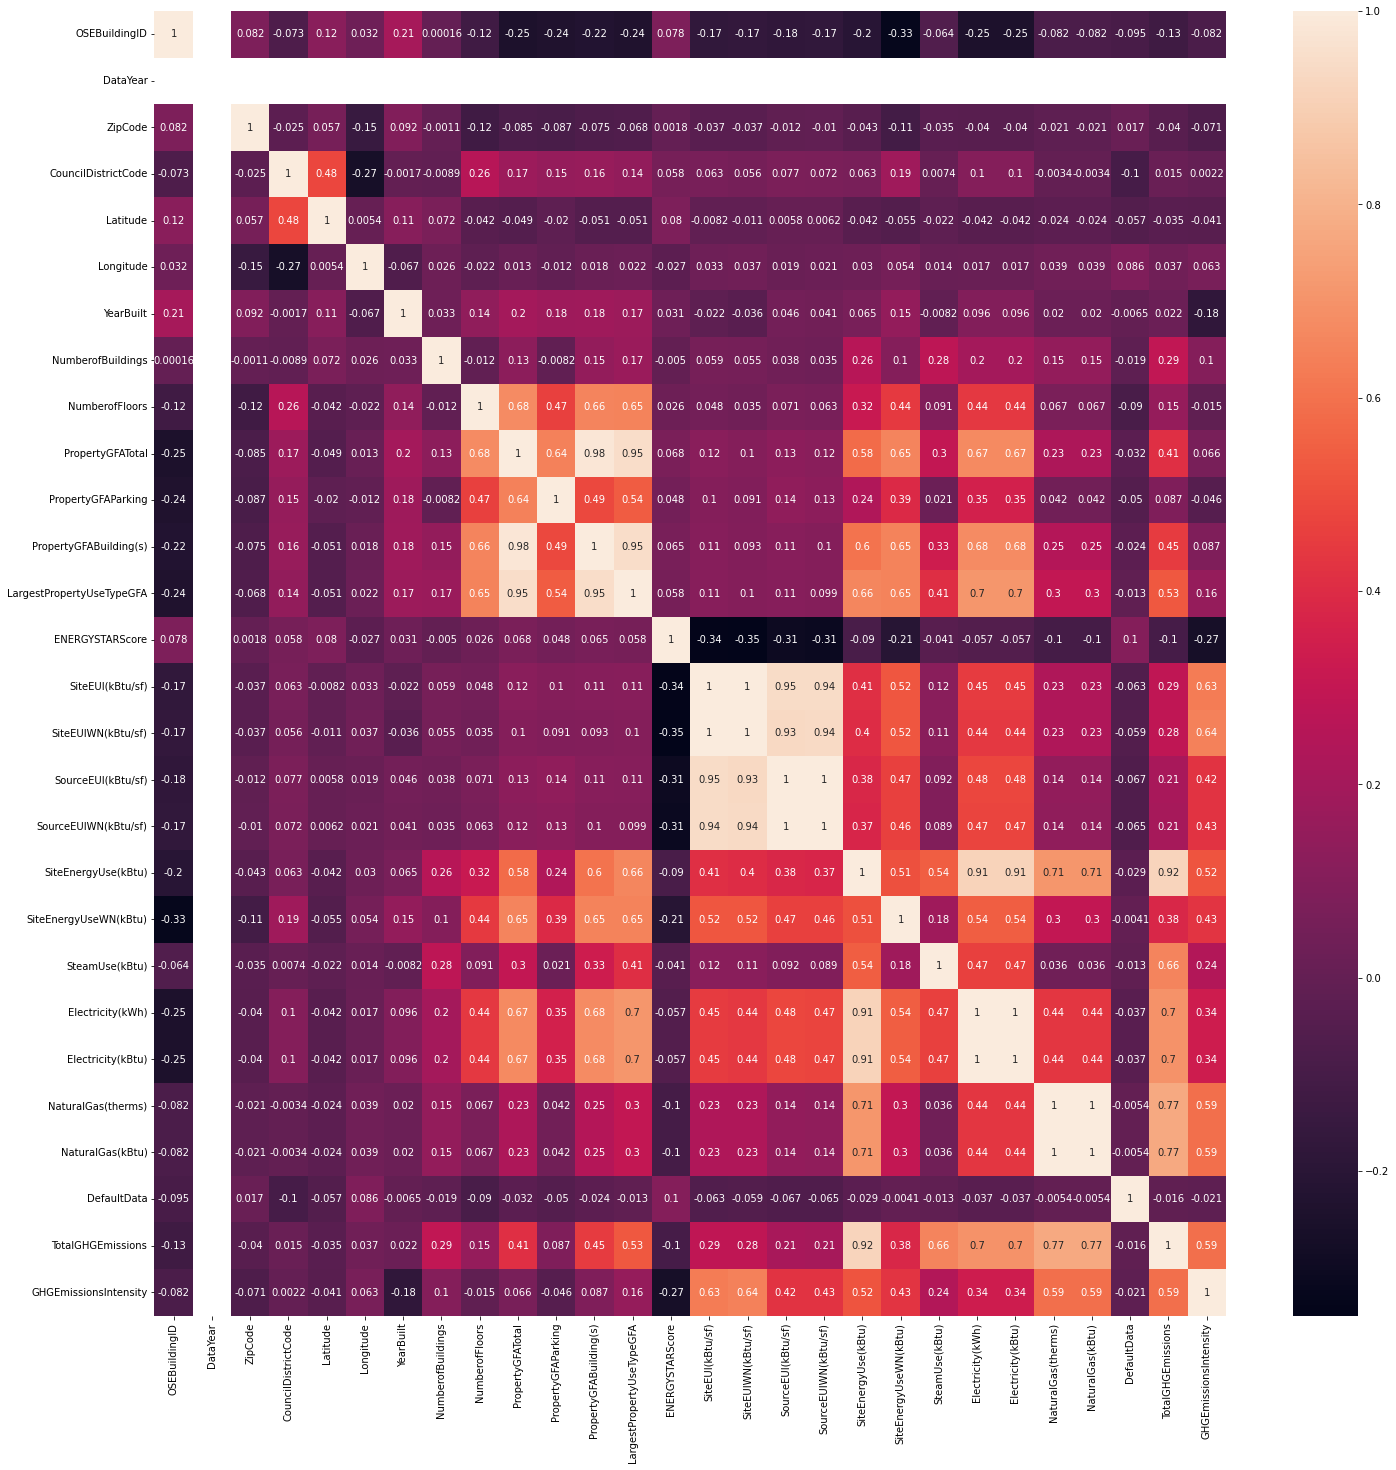

In [7]:
# correlation matrix
fig, ax = plt.subplots(figsize=(24, 24))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
X = X.drop(columns=['PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity'])
X.head()

,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,88434,60.0,81.699997,84.300003,182.500000,189.000000,2.761569,3946027.0,1276453.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15064,88502,61.0,94.800003,97.900002,176.100006,179.399994,2.771009,3242851.0,5145082.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196718,759392,43.0,96.000000,97.699997,241.899994,244.100006,2.896946,49526664.0,1493800.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61320,56.0,110.800003,113.300003,216.199997,224.000000,2.757081,2768924.0,1811213.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62000,113580,75.0,114.800003,118.699997,211.399994,215.600006,2.803384,5368607.0,8803998.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Removing the variables from the consumption bill for our predictions

There are certain variables that we don't want to work with because they depend on existing buildings.
We want to make our predictions for future buildings. 

In [9]:
X = X.drop(columns=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'Electricity(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'])
X.head()

,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,88434,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15064,88502,61.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196718,759392,43.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61320,56.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62000,113580,75.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Notes about Cross Validation

To start creating ML models, we gotta do cross-validation of our data which means dividing our dataset into a training set and a testing set.
To do so, usually, we divide our data into a certain number of blocks, for instance:

- Ten Fold Blocks Cross Validation (10 blocks)
- Four Fold Blocks Cross Validation (4 blocks)

Then we can use our different models (logistic regression, KNN, SVM...) on our training set, compare them and see which one is the most fittable to our data.

- The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

- Kernel is the mathematical function used to define the hyperparameter and it can be: linear, polynomial, rbf for instance.

Generally cross validation is used for two purposes:

- Defining the best hyperparameters for the model

- Test the model on different data points

# Features Importance

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

MDI = Mean Decrease in Impurity 

In [10]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.sort(importance)[:10]
    feature_names = np.array(names)[:10]
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type +  ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

# Naive Baseline Creation

Using the mean strategy, we create a baseline to compare our ML models


In [11]:
# adding a dummy baseline to our cross-validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_predict_dummy = dummy.predict(X_test)

# dummy statistical metrics

dummy_test_mse = mean_squared_error(y_test, y_predict_dummy)
dummy_test_mae = mean_absolute_error(y_test, y_predict_dummy)
dummy_test_r2 = r2_score(y_test, y_predict_dummy)
dummy_test_rmse = sqrt(mean_squared_error(y_test, y_predict_dummy))

# cross-validation

cv_dummy = cross_val_score(dummy, X_test, y_predict_dummy, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')

# Linear Regression (Ridge)

In [12]:
from sklearn.linear_model import Ridge

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# start timer
t1_start = process_time()

# call the model
ridge = Ridge(random_state = 20)

# hyperparameters
ridge_params = {'alpha':(0.1, 1, 10, 100)}

# cross validation to tune hyperparameter
g_ridge = GridSearchCV(ridge, param_grid = ridge_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_ridge.fit(X_train, y_train)

#Predict the response for test and train datasets
y_ridge_test_pred = g_ridge.predict(X_test)
y_ridge_train_pred = g_ridge.predict(X_train)

# mean error square
ridge_test_mae = mean_absolute_error(y_test, y_ridge_test_pred)
ridge_train_mae = mean_absolute_error(y_train, y_ridge_train_pred)

# best hyperparameter
g_ridge_param = g_ridge.best_params_

# The mean squared error
ridge_test_mse = mean_squared_error(y_test, y_ridge_test_pred)
ridge_train_mse = mean_squared_error(y_train, y_ridge_train_pred)

# The coefficient of determination: 1 is perfect prediction
ridge_test_r2 = r2_score(y_test, y_ridge_test_pred)
ridge_train_r2 = r2_score(y_train, y_ridge_train_pred)

# The root mean squared error
ridge_test_rmse = sqrt(mean_squared_error(y_test, y_ridge_test_pred))
ridge_train_rmse = sqrt(mean_squared_error(y_train, y_ridge_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
ridge_time = t1_stop-t1_start

print("Elapsed time in seconds to run Ridge:", ridge_time) 

Elapsed time in seconds to run Ridge: 1.6266660259999988


In [13]:
import optuna

def objective(trial):

    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    solver = trial.suggest_categorical("solver",choices=["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"])
    
    
    ## Create Model

    optuna_ridge  = Ridge(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, solver=solver)
   
    ## Fit Model
    
    optuna_ridge.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_ridge.predict(X_test))
    

t1_start = process_time()


study10 = optuna.create_study(study_name="RidgeRegression")
study10.optimize(objective, n_trials=47)

# evaluation metrics

optuna_ridge_rmse = sqrt(study10.best_value)
optuna_ridge_mse = study10.best_value
optuna_ridge_params = study10.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
ridge_time = t1_stop-t1_start

print("Elapsed time in seconds to run Ridge Regression with Optuna tuning hyperparameters:", ridge_time)

print("Best Params : {}".format(optuna_ridge_params))
print("\nBest MSE : {}".format(optuna_ridge_mse))
print("\nBest RMSE : {}".format(optuna_ridge_rmse))


[I 2022-01-31 19:01:57,228] A new study created in memory with name: RidgeRegression
[I 2022-01-31 19:01:57,247] Trial 0 finished with value: 122910.95511105444 and parameters: {'fit_intercept': False, 'n_estimators': 1, 'tol': 0.09342342680707094, 'alpha': 584.1071293993806, 'solver': 'sparse_cg'}. Best is trial 0 with value: 122910.95511105444.
[I 2022-01-31 19:01:57,265] Trial 1 finished with value: 120459.82466548006 and parameters: {'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}. Best is trial 1 with value: 120459.82466548006.
[I 2022-01-31 19:01:57,282] Trial 2 finished with value: 134864.87939540314 and parameters: {'fit_intercept': False, 'n_estimators': 232, 'tol': 0.3706146090178317, 'alpha': 170.43287302403843, 'solver': 'cholesky'}. Best is trial 1 with value: 120459.82466548006.
[I 2022-01-31 19:01:57,299] Trial 3 finished with value: 122910.95511099191 and parameters: {'fit_intercept': False, 'n_estima

Elapsed time in seconds to run Ridge Regression with Optuna tuning hyperparameters: 6.667698850000001
Best Params : {'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}

Best MSE : 120459.82466548006

Best RMSE : 347.0732266618675


In [14]:
# cross validation

cv_ridge_train = cross_val_score(g_ridge, X_train, y_ridge_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_ridge_test = cross_val_score(g_ridge, X_test, y_ridge_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_ridge_results = pd.DataFrame([-cv_ridge_train, -cv_ridge_test, -cv_dummy]).transpose()
cv_ridge_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_ridge_results

,Training Dataset,Test Dataset,Dummy
0,0.019653,0.116385,8.077936e-28
1,0.026305,0.045826,8.077936e-28
2,0.026736,0.460706,8.077936e-28
3,0.011674,0.146653,8.077936e-28
4,0.050454,0.268816,8.077936e-28


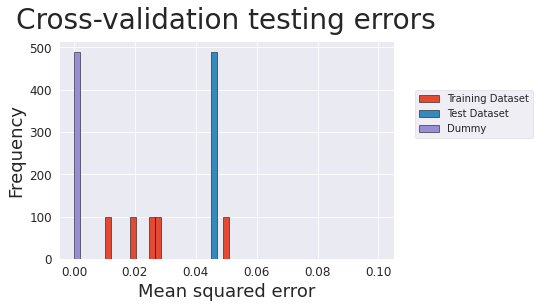

In [15]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.1, num=50)
hist = cv_ridge_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [16]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
ridge_results = pd.DataFrame(['Ridge Regression', ridge_time, g_ridge_param, optuna_ridge_params, ridge_train_mae, ridge_test_mae, dummy_test_mae, ridge_train_mse, ridge_test_mse, optuna_ridge_mse, dummy_test_mse, ridge_train_rmse, ridge_test_rmse, optuna_ridge_rmse, dummy_test_rmse, ridge_train_r2, ridge_test_r2, dummy_test_r2]).transpose()
ridge_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.667699,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}",173.131158,157.622754,116.981859,342924.313713,135397.159470,120459.824665,38134.369260,585.597399,367.963530,347.073227,195.280233,0.277376,0.185920,-0.060177


# Linear Regression Model (Simple/Least Squares)

More details here: https://realpython.com/linear-regression-in-python/

There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.

Simple linear regression is used to estimate the relationship between **two quantitative variables**. 

In [17]:
# We'll start by doing a Linear Regression using one variable to predict our variable TotalGHGEmissions

from sklearn.linear_model import LinearRegression
from sklearn import linear_model


# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 20)

# start timer
t1_start = process_time()

# call the model
lr = linear_model.LinearRegression()

# train our model
lr.fit(X_train, y_train)

# Predict the response for test and train datasets
y_lr_test_pred = lr.predict(X_test)
y_lr_train_pred = lr.predict(X_train)

# mean error square
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)

# The mean squared error
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)

# The coefficient of determination: 1 is perfect prediction
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# The root mean squared error
lr_test_rmse = sqrt(mean_squared_error(y_test, y_lr_test_pred))
lr_train_rmse = sqrt(mean_squared_error(y_train, y_lr_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
lr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Least Squares:", lr_time) 

Elapsed time in seconds to run Least Squares: 0.1324378359999976


In [18]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    

    ## Create Model
    
    optuna_lr  = LinearRegression(fit_intercept=fit_intercept)
    
    ## Fit Model
    
    optuna_lr.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_lr.predict(X_test))
    

t1_start = process_time()


study4 = optuna.create_study(study_name="LinearRegression")
study4.optimize(objective, n_trials=47)

# evaluation metrics

optuna_lr_rmse = sqrt(study4.best_value)
optuna_lr_mse = study4.best_value
optuna_lr_params = study4.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
lr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Linear Regression with Optuna tuning hyperparameters:", lr_time)

print("Best Params : {}".format(optuna_lr_params))
print("\nBest MSE : {}".format(optuna_lr_mse))
print("\nBest RMSE : {}".format(optuna_lr_rmse))


[I 2022-01-31 19:02:03,326] A new study created in memory with name: LinearRegression
[I 2022-01-31 19:02:03,348] Trial 0 finished with value: 127603.14156673796 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 127603.14156673796.
[I 2022-01-31 19:02:03,369] Trial 1 finished with value: 127603.1415667572 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 127603.14156673796.
[I 2022-01-31 19:02:03,388] Trial 2 finished with value: 127603.1415667572 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 127603.14156673796.
[I 2022-01-31 19:02:03,408] Trial 3 finished with value: 127603.14156673796 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 127603.14156673796.
[I 2022-01-31 19:02:03,427] Trial 4 finished with value: 127603.1415667572 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 127603.14156673796.
[I 2022-01-31 19:02:03,448] Trial 5 finished with value: 127603.1415667572 and parameters

Elapsed time in seconds to run Linear Regression with Optuna tuning hyperparameters: 3.4276807689999984
Best Params : {'fit_intercept': True}

Best MSE : 127603.14156673796

Best RMSE : 357.21581931199233


In [19]:
# cross validation

cv_lr_train = cross_val_score(lr, X_train, y_lr_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lr_test = cross_val_score(lr, X_test, y_lr_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lr_results = pd.DataFrame([-cv_lr_train, -cv_lr_test, -cv_dummy]).transpose()
cv_lr_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_lr_results

,Training Dataset,Test Dataset,Dummy
0,2.780855e-24,3.196711e-24,8.077936e-28
1,2.348674e-16,3.017113e-24,8.077936e-28
2,2.697248e-24,9.658154e+01,8.077936e-28
3,5.133464e+01,3.875557e+01,8.077936e-28
4,1.244575e-23,2.658236e-25,8.077936e-28


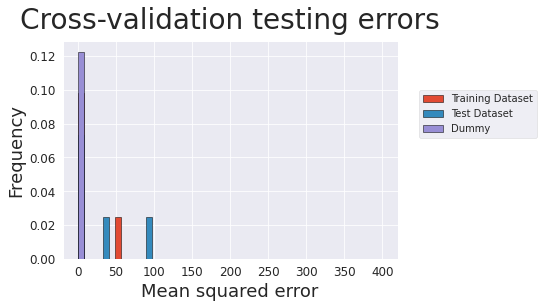

In [20]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=400, num=50)
hist = cv_lr_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [21]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
lr_results = pd.DataFrame(['Least Squares Regression', lr_time, optuna_lr_params, lr_train_mae, lr_test_mae, dummy_test_mae, lr_train_mse, lr_test_mse, optuna_lr_mse, dummy_test_mse, lr_train_rmse, lr_test_rmse, optuna_lr_rmse, dummy_test_rmse, lr_train_r2, lr_test_r2, dummy_test_r2]).transpose()
lr_results.columns = ['Method', 'Elapsed Time', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.667699,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}",173.131158,157.622754,116.981859,342924.313713,135397.159470,120459.824665,38134.369260,585.597399,367.963530,347.073227,195.280233,0.277376,0.185920,-0.060177
1,Least Squares Regression,3.427681,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177


# Gradient Boosting

We're going to use two cross-validation methods to define our hyperparameters. To define metrics on our training set we'll use GridSearchCV and for our test set, we'll use **Optuna** library.

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# start timer
t1_start = process_time()

# creating a gradient boost classifier
grad_boosting = GradientBoostingRegressor(validation_fraction=0.2, n_iter_no_change=5, tol=0.01) # creation of early stopping to avoid future overfitting in our model

# define values for hyperparameters
learning_rate = [0.6, 0.75, 0.8]
n_estimators = [20]
max_features = [12]
alpha = [0.85]
max_leaf_nodes = [20]
min_samples_leaf = [4]
min_weight_fraction_leaf = [0.39]
max_depth = [7]
min_impurity_decrease = [0.5]

# Create the random grid
gboosting_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_features': max_features, 'alpha': alpha, 'max_leaf_nodes':max_leaf_nodes, 'min_samples_leaf':min_samples_leaf, 'min_weight_fraction_leaf':min_weight_fraction_leaf, 'max_depth':max_depth, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_boosting = GridSearchCV(grad_boosting, param_grid = gboosting_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
grad_boosting.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_grad_boosting_test_pred = grad_boosting.predict(X_test)
y_grad_boosting_train_pred = grad_boosting.predict(X_train)

# fit the grid
g_boosting.fit(X_train, y_train)

# best hyperparameter
g_boosting_param = g_boosting.best_params_

# The mean absolute error
grad_boosting_test_mae = mean_absolute_error(y_test, y_grad_boosting_test_pred)
grad_boosting_train_mae = mean_absolute_error(y_train, y_grad_boosting_train_pred)

# The mean squared error
grad_boosting_test_mse = mean_squared_error(y_test, y_grad_boosting_test_pred)
grad_boosting_train_mse = mean_squared_error(y_train, y_grad_boosting_train_pred)

# The coefficient of determination: 1 is perfect prediction
grad_boosting_test_r2 = r2_score(y_test, y_grad_boosting_test_pred)
grad_boosting_train_r2 = r2_score(y_train, y_grad_boosting_train_pred)

# The root mean squared error
grad_boosting_test_rmse = sqrt(mean_squared_error(y_test, y_grad_boosting_test_pred))
grad_boosting_train_rmse = sqrt(mean_squared_error(y_train, y_grad_boosting_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
grad_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run Gradient Boosting Regressor:", grad_boosting_time)

Elapsed time in seconds to run Gradient Boosting Regressor: 0.24882825099999906


In [23]:
import optuna

def objective(trial):
    
    learning_rate = trial.suggest_float("learning_rate", 0, 1)
    n_estimators = trial.suggest_int("n_estimators", 1, 100)
    max_features = trial.suggest_int("max_features", 1, 20)
    alpha = trial.suggest_float("alpha", 0, 1)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    validation_fraction= trial.suggest_float("validation_fraction", 0.1, 1)
    n_iter_no_change= trial.suggest_int("n_iter_no_change", 0.1, 25)
    tol= trial.suggest_float("tol", 0.1, 10)
    

    ## Create Model
    
    optuna_grad_boosting  = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_features=max_features, alpha=alpha, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, validation_fraction=validation_fraction, n_iter_no_change=n_iter_no_change, tol=tol)
    
    ## Fit Model
    
    optuna_grad_boosting.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_grad_boosting.predict(X_test))
    

t1_start = process_time()


study1 = optuna.create_study(study_name="GradientBoostingRegressor")
study1.optimize(objective, n_trials=47)

# evaluation metrics

optuna_grad_boosting_rmse = sqrt(study1.best_value)
optuna_grad_boosting_mse = study1.best_value
optuna_grad_boosting_params = study1.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
grad_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run Gradient Boosting Regressor with Optuna tuning hyperparameters:", grad_boosting_time)

print("Best Params : {}".format(optuna_grad_boosting_params))
print("\nBest MSE : {}".format(optuna_grad_boosting_mse))
print("\nBest RMSE : {}".format(optuna_grad_boosting_rmse))


[I 2022-01-31 19:02:07,193] A new study created in memory with name: GradientBoostingRegressor
[I 2022-01-31 19:02:07,211] Trial 0 finished with value: 239281.77729708067 and parameters: {'learning_rate': 0.689709585367157, 'n_estimators': 5, 'max_features': 20, 'alpha': 0.5785415500037728, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.08829937284050021, 'max_depth': 8, 'min_impurity_decrease': 0.4631856491759747, 'validation_fraction': 0.1326356802708882, 'n_iter_no_change': 1, 'tol': 8.408838196619302}. Best is trial 0 with value: 239281.77729708067.
[I 2022-01-31 19:02:07,228] Trial 1 finished with value: 273378.6252337081 and parameters: {'learning_rate': 0.537849266258742, 'n_estimators': 2, 'max_features': 7, 'alpha': 0.9326370949042347, 'max_leaf_nodes': 9, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.15473379386414843, 'max_depth': 9, 'min_impurity_decrease': 0.8701673979137324, 'validation_fraction': 0.5259102573811391, 'n_iter_no_change': 

Elapsed time in seconds to run Gradient Boosting Regressor with Optuna tuning hyperparameters: 3.8920506669999995
Best Params : {'learning_rate': 0.1627452278948744, 'n_estimators': 44, 'max_features': 15, 'alpha': 0.9379066500492953, 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.022033139630568715, 'max_depth': 14, 'min_impurity_decrease': 0.6709612435089373, 'validation_fraction': 0.18541648059824545, 'n_iter_no_change': 24, 'tol': 8.125363197582672}

Best MSE : 175427.25378806255

Best RMSE : 418.84036790651226


In [24]:
# cross validation

cv_grad_boosting_train = cross_val_score(grad_boosting, X_train, y_grad_boosting_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_grad_boosting_test = cross_val_score(grad_boosting, X_test, y_grad_boosting_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_grad_boosting_results = pd.DataFrame([-cv_grad_boosting_train, -cv_grad_boosting_test, -cv_dummy]).transpose()
cv_grad_boosting_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_grad_boosting_results

,Training Dataset,Test Dataset,Dummy
0,2064.581610,0.000253,8.077936e-28
1,0.000004,13158.129011,8.077936e-28
2,107456.601848,9607.405290,8.077936e-28
3,281164.515391,1.676635,8.077936e-28
4,705.930083,0.036159,8.077936e-28


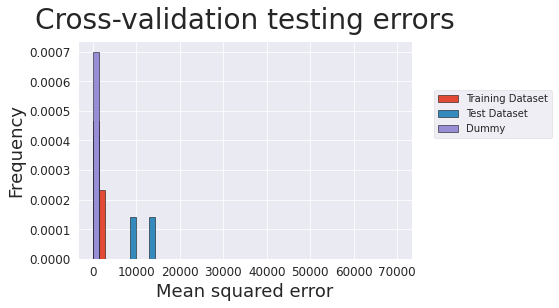

In [25]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=70000, num=50)
hist = cv_grad_boosting_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [26]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
grad_boosting_results = pd.DataFrame(['Gradient Boosting', grad_boosting_time, g_boosting_param, optuna_grad_boosting_params, grad_boosting_train_mae, grad_boosting_test_mae, dummy_test_mae, grad_boosting_train_mse, grad_boosting_test_mse, optuna_grad_boosting_mse, dummy_test_mse, grad_boosting_train_rmse, grad_boosting_test_rmse, optuna_grad_boosting_rmse, dummy_test_rmse, grad_boosting_train_r2, grad_boosting_test_r2, dummy_test_r2]).transpose()
grad_boosting_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.667699,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}",173.131158,157.622754,116.981859,342924.313713,135397.159470,120459.824665,38134.369260,585.597399,367.963530,347.073227,195.280233,0.277376,0.185920,-0.060177
1,Least Squares Regression,3.427681,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,3.892051,"{'alpha': 0.85, 'learning_rate': 0.6, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.1627452278948744, 'n_estimators': 44, 'max_features': 15, 'alpha': 0.9379066500492953, 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.022033139630568715, 'max_depth': 14, 'min_impurity_decrease': 0.6709612435089373, 'validation_fraction': 0.18541648059824545, 'n_iter_no_change': 24, 'tol': 8.125363197582672}",109.887527,128.723749,116.981859,175773.410226,252267.785918,175427.253788,38134.369260,419.253396,502.262666,418.840368,195.280233,0.587577,0.096134,-0.060177


# Elastic Net

In [27]:
from sklearn.linear_model import ElasticNet

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

# start timer
t1_start = process_time()

# call the model
elastic_net = ElasticNet()

# hyperparameters
elasticnet_params = {'alpha':(0, 1, 10, 100, 1000, 10000)}

# cross validation to tune hyperparameter
g_elasticnet = GridSearchCV(elastic_net, param_grid = elasticnet_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_elasticnet.fit(X_train, y_train)

#Predict the response for test and train datasets
y_elastic_test_pred = g_elasticnet.predict(X_test)
y_elastic_train_pred = g_elasticnet.predict(X_train)

# mean error square
elastic_test_mae = mean_absolute_error(y_test, y_elastic_test_pred)
elastic_train_mae = mean_absolute_error(y_train, y_elastic_train_pred)

# best hyperparameter
g_elasticnet_param = g_elasticnet.best_params_

# The mean squared error
elastic_test_mse = mean_squared_error(y_test, y_elastic_test_pred)
elastic_train_mse = mean_squared_error(y_train, y_elastic_train_pred)

# The coefficient of determination: 1 is perfect prediction
elastic_test_r2 = r2_score(y_test, y_elastic_test_pred)
elastic_train_r2 = r2_score(y_train, y_elastic_train_pred)

# The root mean squared error
elastic_test_rmse = sqrt(mean_squared_error(y_test, y_elastic_test_pred))
elastic_train_rmse = sqrt(mean_squared_error(y_train, y_elastic_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
elastic_time = t1_stop-t1_start

print("Elapsed time in seconds to run Elastic Net:", elastic_time)

Elapsed time in seconds to run Elastic Net: 3.149230387000003


In [28]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    selection = trial.suggest_categorical("selection",choices=["cyclic","random"])
    l1_ratio = trial.suggest_float("l1_ratio", 0, 1)
    
    

    ## Create Model

    optuna_elastic  = ElasticNet(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, warm_start=warm_start, selection=selection, l1_ratio=l1_ratio)
    
    
    ## Fit Model
    
    optuna_elastic.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_elastic.predict(X_test))
    
t1_start = process_time()


study6 = optuna.create_study(study_name="ElasticNetRegression")
study6.optimize(objective, n_trials=47)

# evaluation metrics

optuna_elastic_rmse = sqrt(study6.best_value)
optuna_elastic_mse = study6.best_value
optuna_elastic_params = study6.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
elastic_time = t1_stop-t1_start

print("Elapsed time in seconds to run Elastic Net Regression with Optuna tuning hyperparameters:", elastic_time)

print("Best Params : {}".format(optuna_elastic_params))
print("\nBest MSE : {}".format(optuna_elastic_mse))
print("\nBest RMSE : {}".format(optuna_elastic_rmse))


[I 2022-01-31 19:02:14,951] A new study created in memory with name: ElasticNetRegression
[I 2022-01-31 19:02:14,967] Trial 0 finished with value: 78095.62376338865 and parameters: {'fit_intercept': False, 'n_estimators': 984, 'tol': 0.3616529133342277, 'alpha': 790.0617352189724, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.48425609479700127}. Best is trial 0 with value: 78095.62376338865.
[I 2022-01-31 19:02:14,987] Trial 1 finished with value: 107111.77340757365 and parameters: {'fit_intercept': False, 'n_estimators': 880, 'tol': 0.19123895903149501, 'alpha': 717.6985564820156, 'warm_start': True, 'selection': 'cyclic', 'l1_ratio': 0.6912463611314064}. Best is trial 0 with value: 78095.62376338865.
[I 2022-01-31 19:02:15,008] Trial 2 finished with value: 107036.700807116 and parameters: {'fit_intercept': False, 'n_estimators': 868, 'tol': 0.003810734802272564, 'alpha': 687.906215705604, 'warm_start': True, 'selection': 'cyclic', 'l1_ratio': 0.5278000257693294}. Best is t

Elapsed time in seconds to run Elastic Net Regression with Optuna tuning hyperparameters: 7.69159166
Best Params : {'fit_intercept': False, 'n_estimators': 574, 'tol': 0.41619506819564533, 'alpha': 985.9758566790616, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.6844368749226185}

Best MSE : 56267.99766121965

Best RMSE : 237.20876387945628


In [29]:
# cross validation

cv_elasticnet_train = cross_val_score(g_elasticnet, X_train, y_elastic_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_elasticnet_test = cross_val_score(g_elasticnet, X_test, y_elastic_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_elasticnet_results = pd.DataFrame([-cv_elasticnet_train, -cv_elasticnet_test, -cv_dummy]).transpose()
cv_elasticnet_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_elasticnet_results

,Training Dataset,Test Dataset,Dummy
0,2.994299e-13,5.884821e-12,8.077936e-28
1,5.981537e-13,4.784167e-12,8.077936e-28
2,1.044780e-12,1.025189e-11,8.077936e-28
3,8.335897e-12,1.416905e-13,8.077936e-28
4,5.514535e-13,1.162562e-10,8.077936e-28


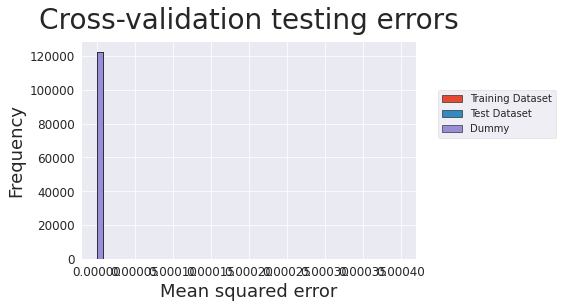

In [30]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.0004, num=50)
hist = cv_elasticnet_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [31]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
elastic_results = pd.DataFrame(['Elastic Net Regression', elastic_time, g_elasticnet_param, optuna_elastic_params, elastic_train_mae, elastic_test_mae, dummy_test_mae, elastic_train_mse, elastic_test_mse, optuna_elastic_mse, dummy_test_mse, elastic_train_rmse, elastic_test_rmse, optuna_elastic_rmse, dummy_test_rmse, elastic_train_r2, elastic_test_r2, dummy_test_r2]).transpose()
elastic_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.667699,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}",173.131158,157.622754,116.981859,342924.313713,135397.159470,120459.824665,38134.369260,585.597399,367.963530,347.073227,195.280233,0.277376,0.185920,-0.060177
1,Least Squares Regression,3.427681,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,3.892051,"{'alpha': 0.85, 'learning_rate': 0.6, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.1627452278948744, 'n_estimators': 44, 'max_features': 15, 'alpha': 0.9379066500492953, 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.022033139630568715, 'max_depth': 14, 'min_impurity_decrease': 0.6709612435089373, 'validation_fraction': 0.18541648059824545, 'n_iter_no_change': 24, 'tol': 8.125363197582672}",109.887527,128.723749,116.981859,175773.410226,252267.785918,175427.253788,38134.369260,419.253396,502.262666,418.840368,195.280233,0.587577,0.096134,-0.060177
3,Elastic Net Regression,7.691592,{'alpha': 10000},"{'fit_intercept': False, 'n_estimators': 574, 'tol': 0.41619506819564533, 'alpha': 985.9758566790616, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.6844368749226185}",164.059273,142.382032,116.981859,376825.124256,110141.216123,56267.997661,38134.369260,613.860835,331.875302,237.208764,195.280233,0.288980,-2.062046,-0.060177


# Linear Regression (Lasso)

In [32]:
from sklearn.linear_model import Lasso

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

# start timer
t1_start = process_time()

# call the model
lasso = Lasso()

# hyperparameters
lasso_params = {'alpha':(0.1, 1, 10, 100)}

# cross validation to tune hyperparameter
g_lasso = GridSearchCV(lasso, param_grid = lasso_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_lasso.fit(X_train, y_train)

#Predict the response for test and train datasets
y_lasso_test_pred = g_lasso.predict(X_test)
y_lasso_train_pred = g_lasso.predict(X_train)

# mean error square
lasso_test_mae = mean_absolute_error(y_test, y_lasso_test_pred)
lasso_train_mae = mean_absolute_error(y_train, y_lasso_train_pred)

# best hyperparameter
g_lasso_param = g_lasso.best_params_

# The mean squared error
lasso_test_mse = mean_squared_error(y_test, y_lasso_test_pred)
lasso_train_mse = mean_squared_error(y_train, y_lasso_train_pred)

# The coefficient of determination: 1 is perfect prediction
lasso_test_r2 = r2_score(y_test, y_lasso_test_pred)
lasso_train_r2 = r2_score(y_train, y_lasso_train_pred)

# The root mean squared error
lasso_test_rmse = sqrt(mean_squared_error(y_test, y_lasso_test_pred))
lasso_train_rmse = sqrt(mean_squared_error(y_train, y_lasso_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
lasso_time = t1_stop-t1_start

print("Elapsed time in seconds to run Lasso:", lasso_time) 

Elapsed time in seconds to run Lasso: 2.085876779000003


In [33]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    selection = trial.suggest_categorical("selection",choices=["cyclic","random"])
    
    

    ## Create Model
    
    optuna_lasso  = Lasso(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, warm_start=warm_start, selection=selection)
    
    ## Fit Model
    
    optuna_lasso.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_lasso.predict(X_test))
    
t1_start = process_time()


study5 = optuna.create_study(study_name="LassoRegression")
study5.optimize(objective, n_trials=47)

# evaluation metrics

optuna_lasso_rmse = sqrt(study5.best_value)
optuna_lasso_mse = study5.best_value
optuna_lasso_params = study5.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
lasso_time = t1_stop-t1_start

print("Elapsed time in seconds to run Lasso Regression with Optuna tuning hyperparameters:", lasso_time)

print("Best Params : {}".format(optuna_lasso_params))
print("\nBest MSE : {}".format(optuna_lasso_mse))
print("\nBest RMSE : {}".format(optuna_lasso_rmse))


[I 2022-01-31 19:02:25,062] A new study created in memory with name: LassoRegression
[I 2022-01-31 19:02:25,077] Trial 0 finished with value: 97850.85122527603 and parameters: {'fit_intercept': False, 'n_estimators': 559, 'tol': 0.42259961413553154, 'alpha': 387.7897981766828, 'warm_start': True, 'selection': 'random'}. Best is trial 0 with value: 97850.85122527603.
[I 2022-01-31 19:02:25,094] Trial 1 finished with value: 79463.25043895289 and parameters: {'fit_intercept': False, 'n_estimators': 144, 'tol': 0.42569420531361835, 'alpha': 537.5404503940946, 'warm_start': False, 'selection': 'cyclic'}. Best is trial 1 with value: 79463.25043895289.
[I 2022-01-31 19:02:25,114] Trial 2 finished with value: 108339.83556607738 and parameters: {'fit_intercept': False, 'n_estimators': 544, 'tol': 0.33052831509582487, 'alpha': 371.7478965639084, 'warm_start': False, 'selection': 'random'}. Best is trial 1 with value: 79463.25043895289.
[I 2022-01-31 19:02:25,133] Trial 3 finished with value: 108

Elapsed time in seconds to run Lasso Regression with Optuna tuning hyperparameters: 6.827814129999993
Best Params : {'fit_intercept': False, 'n_estimators': 1, 'tol': 0.4175497061013981, 'alpha': 929.0400463700298, 'warm_start': False, 'selection': 'cyclic'}

Best MSE : 66306.01927801539

Best RMSE : 257.49955199575663


In [34]:
# cross validation

cv_lasso_train = cross_val_score(g_lasso, X_train, y_lasso_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lasso_test = cross_val_score(g_lasso, X_test, y_lasso_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lasso_results = pd.DataFrame([-cv_lasso_train, -cv_lasso_test, -cv_dummy]).transpose()
cv_lasso_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_lasso_results

,Training Dataset,Test Dataset,Dummy
0,0.012896,0.000053,8.077936e-28
1,0.001420,0.000531,8.077936e-28
2,0.000301,0.000103,8.077936e-28
3,0.000297,0.000261,8.077936e-28
4,0.002049,0.000073,8.077936e-28


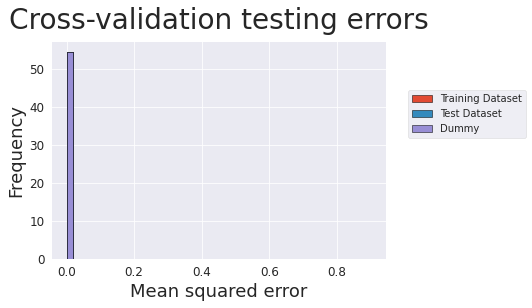

In [35]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.9, num=50)
hist = cv_lasso_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [36]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
lasso_results = pd.DataFrame(['Lasso Regression', lasso_time, g_lasso_param, optuna_lasso_params, lasso_train_mae, lasso_test_mae, dummy_test_mae, lasso_train_mse, lasso_test_mse, optuna_lasso_mse, dummy_test_mse, lasso_train_rmse, lasso_test_rmse, optuna_lasso_rmse, dummy_test_rmse, lasso_train_r2, lasso_test_r2, dummy_test_r2]).transpose()
lasso_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.667699,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}",173.131158,157.622754,116.981859,342924.313713,135397.159470,120459.824665,38134.369260,585.597399,367.963530,347.073227,195.280233,0.277376,0.185920,-0.060177
1,Least Squares Regression,3.427681,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,3.892051,"{'alpha': 0.85, 'learning_rate': 0.6, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.1627452278948744, 'n_estimators': 44, 'max_features': 15, 'alpha': 0.9379066500492953, 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.022033139630568715, 'max_depth': 14, 'min_impurity_decrease': 0.6709612435089373, 'validation_fraction': 0.18541648059824545, 'n_iter_no_change': 24, 'tol': 8.125363197582672}",109.887527,128.723749,116.981859,175773.410226,252267.785918,175427.253788,38134.369260,419.253396,502.262666,418.840368,195.280233,0.587577,0.096134,-0.060177
3,Elastic Net Regression,7.691592,{'alpha': 10000},"{'fit_intercept': False, 'n_estimators': 574, 'tol': 0.41619506819564533, 'alpha': 985.9758566790616, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.6844368749226185}",164.059273,142.382032,116.981859,376825.124256,110141.216123,56267.997661,38134.369260,613.860835,331.875302,237.208764,195.280233,0.288980,-2.062046,-0.060177
4,Lasso Regression,6.827814,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.4175497061013981, 'alpha': 929.0400463700298, 'warm_start': False, 'selection': 'cyclic'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,66306.019278,38134.369260,607.457675,324.615949,257.499552,195.280233,0.303736,-1.929554,-0.060177


# Decision Trees

In [37]:
from sklearn.tree import DecisionTreeRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# Call the model 
tree = DecisionTreeRegressor()

# define values for hyperparameters
max_features = [20]
max_depth = [7]
min_samples_split = [4]
min_samples_leaf = [3]
max_leaf_nodes = [5]
min_impurity_decrease = [0.685]

# Create the random grid
tree_grid = {'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes': max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_tree = GridSearchCV(tree, param_grid = tree_grid, cv=KFold(n_splits=5,shuffle=True))

# Performing training
tree.fit(X_train, y_train)

#Predict the response for test and train datasets
y_tree_test_pred = tree.predict(X_test)
y_tree_train_pred = tree.predict(X_train)

# mean error square
tree_test_mae = mean_absolute_error(y_test, y_tree_test_pred)
tree_train_mae = mean_absolute_error(y_train, y_tree_train_pred)

# fit the grid
g_tree.fit(X_train, y_train)

# best hyperparameter
g_tree_param = g_tree.best_params_

# The mean squared error
tree_test_mse = mean_squared_error(y_test, y_tree_test_pred)
tree_train_mse = mean_squared_error(y_train, y_tree_train_pred)


# The coefficient of determination: 1 is perfect prediction
tree_test_r2 = r2_score(y_test, y_tree_test_pred)
tree_train_r2 = r2_score(y_train, y_tree_train_pred)

# The root mean squared error
tree_test_rmse = sqrt(mean_squared_error(y_test, y_tree_test_pred))
tree_train_rmse = sqrt(mean_squared_error(y_train, y_tree_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
tree_time = t1_stop-t1_start

print("Elapsed time in seconds to run Decision Trees:", tree_time)

Elapsed time in seconds to run Decision Trees: 0.07836384799999507


In [38]:
import optuna

def objective(trial):
    
    
    max_features = trial.suggest_int("max_features", 1, 20)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    splitter= trial.suggest_categorical("splitter",choices=["best", "random"]) 
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20) 
    

    ## Create Model
    
    optuna_tree  = DecisionTreeRegressor(max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, min_samples_split=min_samples_split, splitter=splitter)
    
    ## Fit Model
    
    optuna_tree.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_tree.predict(X_test))
    

t1_start = process_time()


study7 = optuna.create_study(study_name="DecisionTreeRegressor")
study7.optimize(objective, n_trials=47)

# evaluation metrics

optuna_tree_rmse = sqrt(study7.best_value)
optuna_tree_mse = study7.best_value
optuna_tree_params = study7.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
rtree_time = t1_stop-t1_start

print("Elapsed time in seconds to run Decision Tree Regressor with Optuna tuning hyperparameters:", tree_time)

print("Best Params : {}".format(optuna_tree_params))
print("\nBest MSE : {}".format(optuna_tree_mse))
print("\nBest RMSE : {}".format(optuna_tree_rmse))


[I 2022-01-31 19:02:32,051] A new study created in memory with name: DecisionTreeRegressor
[I 2022-01-31 19:02:32,063] Trial 0 finished with value: 38134.36925986053 and parameters: {'max_features': 3, 'max_leaf_nodes': 3, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.4154867860790787, 'max_depth': 6, 'min_impurity_decrease': 0.45482981259408595, 'splitter': 'best', 'min_samples_split': 12}. Best is trial 0 with value: 38134.36925986053.
[I 2022-01-31 19:02:32,075] Trial 1 finished with value: 38829.104949296685 and parameters: {'max_features': 6, 'max_leaf_nodes': 22, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.33259693524151474, 'max_depth': 5, 'min_impurity_decrease': 0.06566531382013685, 'splitter': 'best', 'min_samples_split': 6}. Best is trial 0 with value: 38134.36925986053.
[I 2022-01-31 19:02:32,086] Trial 2 finished with value: 39136.66004932279 and parameters: {'max_features': 16, 'max_leaf_nodes': 5, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.20584

Elapsed time in seconds to run Decision Tree Regressor with Optuna tuning hyperparameters: 0.07836384799999507
Best Params : {'max_features': 4, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.047021608102087636, 'max_depth': 2, 'min_impurity_decrease': 0.3639724517733421, 'splitter': 'best', 'min_samples_split': 13}

Best MSE : 37417.889234705974

Best RMSE : 193.43704204393214


In [39]:
# cross validation

cv_tree_train = cross_val_score(g_tree, X_train, y_tree_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_tree_test = cross_val_score(g_tree, X_test, y_tree_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_tree_results = pd.DataFrame([-cv_tree_train, -cv_tree_test, -cv_dummy]).transpose()
cv_tree_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_tree_results

,Training Dataset,Test Dataset,Dummy
0,1.384072e+05,9.999272e+03,8.077936e-28
1,5.955089e+05,8.546161e+03,8.077936e-28
2,1.229491e+06,1.659604e+05,8.077936e-28
3,9.924706e+04,1.231527e+06,8.077936e-28
4,2.412617e+05,1.136572e+04,8.077936e-28


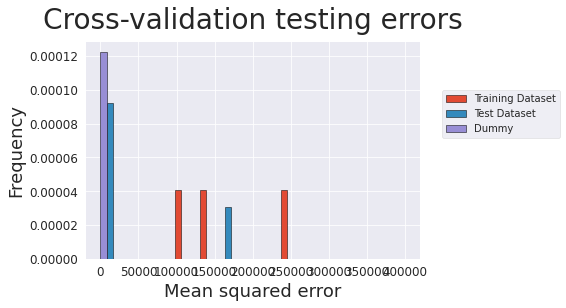

In [40]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=400000, num=50)
hist = cv_tree_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [41]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
tree_results = pd.DataFrame(['Decision Trees Regressor', tree_time, g_tree_param, optuna_tree_params, tree_train_mae, tree_test_mae, dummy_test_mae, tree_train_mse, tree_test_mse, optuna_tree_mse, dummy_test_mse, tree_train_rmse, tree_test_rmse, optuna_tree_rmse, dummy_test_rmse, tree_train_r2, tree_test_r2, dummy_test_r2]).transpose()
tree_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.667699,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}",173.131158,157.622754,116.981859,342924.313713,135397.159470,120459.824665,38134.369260,585.597399,367.963530,347.073227,195.280233,0.277376,0.185920,-0.060177
1,Least Squares Regression,3.427681,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,3.892051,"{'alpha': 0.85, 'learning_rate': 0.6, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.1627452278948744, 'n_estimators': 44, 'max_features': 15, 'alpha': 0.9379066500492953, 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.022033139630568715, 'max_depth': 14, 'min_impurity_decrease': 0.6709612435089373, 'validation_fraction': 0.18541648059824545, 'n_iter_no_change': 24, 'tol': 8.125363197582672}",109.887527,128.723749,116.981859,175773.410226,252267.785918,175427.253788,38134.369260,419.253396,502.262666,418.840368,195.280233,0.587577,0.096134,-0.060177
3,Elastic Net Regression,7.691592,{'alpha': 10000},"{'fit_intercept': False, 'n_estimators': 574, 'tol': 0.41619506819564533, 'alpha': 985.9758566790616, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.6844368749226185}",164.059273,142.382032,116.981859,376825.124256,110141.216123,56267.997661,38134.369260,613.860835,331.875302,237.208764,195.280233,0.288980,-2.062046,-0.060177
4,Lasso Regression,6.827814,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.4175497061013981, 'alpha': 929.0400463700298, 'warm_start': False, 'selection': 'cyclic'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,66306.019278,38134.369260,607.457675,324.615949,257.499552,195.280233,0.303736,-1.929554,-0.060177
5,Decision Trees Regressor,0.078364,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 4, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.047021608102087636, 'max_depth': 2, 'min_impurity_decrease': 0.3639724517733421, 'splitter': 'best', 'min_samples_split': 13}",0.000000,92.847247,116.981859,0.000000,243075.120782,37417.889235,38134.369260,0.000000,493.026491,193.437042,195.280233,1.000000,-5.757754,-0.060177


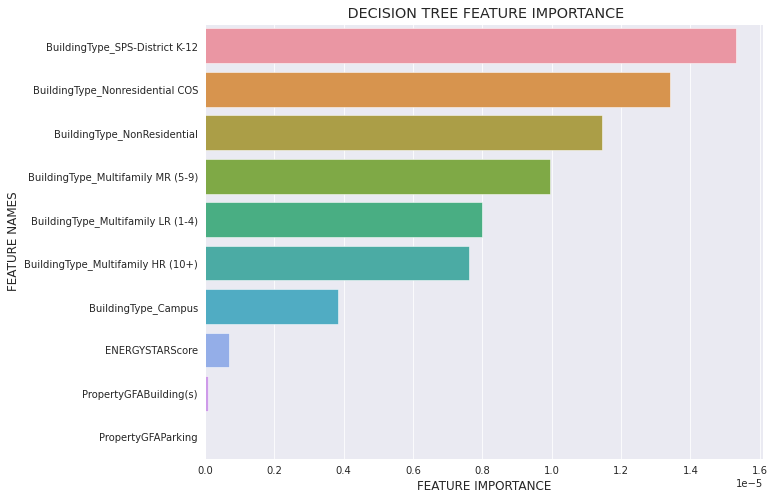

In [42]:
plot_feature_importance(tree.feature_importances_,X.columns,' DECISION TREE')

# Random Forests

In [43]:
# revoir les hyperparamètres de la random forest afin de réduire le temps de run

from sklearn.ensemble import RandomForestRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# create the model
rf = RandomForestRegressor() 

# define values for hyperparameters
n_estimators = [250]
max_features = [10]
max_depth = [8]
min_samples_split = [4]
min_samples_leaf = [3]
max_leaf_nodes = [7]
min_impurity_decrease = [0.65]

# Create the random grid
rf_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes':max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_rf = GridSearchCV(rf, param_grid = rf_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model 
rf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_rf_test_pred = rf.predict(X_test)
y_rf_train_pred = rf.predict(X_train)

# fit the grid
g_rf.fit(X_train, y_train)

# best hyperparameter
g_rf_param = g_rf.best_params_

# The mean absolute error
rf_test_mae = mean_absolute_error(y_test, y_rf_test_pred)
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred)

# The mean squared error
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)

# The coefficient of determination: 1 is perfect prediction
rf_test_r2 = r2_score(y_test, y_rf_test_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

# The root mean squared error
rf_test_rmse = sqrt(mean_squared_error(y_test, y_rf_test_pred))
rf_train_rmse = sqrt(mean_squared_error(y_train, y_rf_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
rf_time = t1_stop-t1_start

print("Elapsed time in seconds to run Random Forest:", rf_time)

Elapsed time in seconds to run Random Forest: 4.074994269000001


In [44]:
import optuna

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1, 100)
    max_features = trial.suggest_int("max_features", 1, 20)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20) 
    max_samples = trial.suggest_int("max_samples", 1, 100)
    bootstrap = trial.suggest_categorical("bootstrap",choices=[True, False]) 
    

    ## Create Model
    
    optuna_rf  = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, min_samples_split=min_samples_split, max_samples=max_samples, bootstrap=bootstrap)
    
    ## Fit Model
    
    optuna_rf.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_rf.predict(X_test))
    

t1_start = process_time()


study2 = optuna.create_study(study_name="RandomForestsRegressor")
study2.optimize(objective, n_trials=47)

# evaluation metrics

optuna_rf_rmse = sqrt(study2.best_value)
optuna_rf_mse = study2.best_value
optuna_rf_params = study2.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
rf_time = t1_stop-t1_start

print("Elapsed time in seconds to run Random Forests Regressor with Optuna tuning hyperparameters:", rf_time)

print("Best Params : {}".format(optuna_rf_params))
print("\nBest MSE : {}".format(optuna_rf_mse))
print("\nBest RMSE : {}".format(optuna_rf_rmse))


[I 2022-01-31 19:02:41,868] A new study created in memory with name: RandomForestsRegressor
[I 2022-01-31 19:02:42,040] Trial 0 finished with value: 34283.122926156604 and parameters: {'n_estimators': 90, 'max_features': 5, 'max_leaf_nodes': 17, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.21063709434335287, 'max_depth': 10, 'min_impurity_decrease': 0.0014167240259392866, 'min_samples_split': 10, 'max_samples': 94, 'bootstrap': True}. Best is trial 0 with value: 34283.122926156604.
[I 2022-01-31 19:02:42,081] Trial 1 finished with value: 32569.579689218335 and parameters: {'n_estimators': 19, 'max_features': 15, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.29874327536228223, 'max_depth': 13, 'min_impurity_decrease': 0.9011440028458937, 'min_samples_split': 6, 'max_samples': 23, 'bootstrap': False}. Best is trial 1 with value: 32569.579689218335.
[I 2022-01-31 19:02:42,168] Trial 2 finished with value: 29202.174614139953 and parameters: {'n_estimator

Elapsed time in seconds to run Random Forests Regressor with Optuna tuning hyperparameters: 5.389934223999987
Best Params : {'n_estimators': 15, 'max_features': 2, 'max_leaf_nodes': 9, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.003478131985064206, 'max_depth': 8, 'min_impurity_decrease': 0.222113100193432, 'min_samples_split': 8, 'max_samples': 55, 'bootstrap': False}

Best MSE : 25463.22613728074

Best RMSE : 159.57200925375585


In [45]:
# cross validation

cv_rf_train = cross_val_score(g_rf, X_train, y_rf_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_rf_test = cross_val_score(g_rf, X_test, y_rf_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_rf_results = pd.DataFrame([-cv_rf_train, -cv_rf_test, -cv_dummy]).transpose()
cv_rf_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_rf_results

,Training Dataset,Test Dataset,Dummy
0,120496.545110,78244.262222,8.077936e-28
1,389710.693706,214965.821471,8.077936e-28
2,67607.448895,8705.787478,8.077936e-28
3,43280.365695,8260.717865,8.077936e-28
4,549775.554251,41471.318134,8.077936e-28


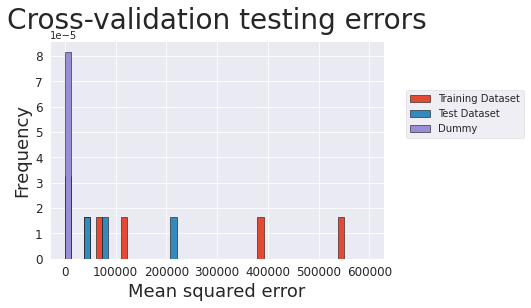

In [46]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=600000, num=50)
hist = cv_rf_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [47]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
rf_results = pd.DataFrame(['Random Forest', rf_time, g_rf_param, optuna_rf_params, rf_train_mae, rf_test_mae, dummy_test_mae, rf_train_mse, rf_test_mse, optuna_rf_mse, dummy_test_mse, rf_train_rmse, rf_test_rmse, optuna_rf_rmse, dummy_test_rmse, rf_train_r2, rf_test_r2, dummy_test_r2]).transpose()
rf_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.667699,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}",173.131158,157.622754,116.981859,342924.313713,135397.159470,120459.824665,38134.369260,585.597399,367.963530,347.073227,195.280233,0.277376,0.185920,-0.060177
1,Least Squares Regression,3.427681,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,3.892051,"{'alpha': 0.85, 'learning_rate': 0.6, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.1627452278948744, 'n_estimators': 44, 'max_features': 15, 'alpha': 0.9379066500492953, 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.022033139630568715, 'max_depth': 14, 'min_impurity_decrease': 0.6709612435089373, 'validation_fraction': 0.18541648059824545, 'n_iter_no_change': 24, 'tol': 8.125363197582672}",109.887527,128.723749,116.981859,175773.410226,252267.785918,175427.253788,38134.369260,419.253396,502.262666,418.840368,195.280233,0.587577,0.096134,-0.060177
3,Elastic Net Regression,7.691592,{'alpha': 10000},"{'fit_intercept': False, 'n_estimators': 574, 'tol': 0.41619506819564533, 'alpha': 985.9758566790616, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.6844368749226185}",164.059273,142.382032,116.981859,376825.124256,110141.216123,56267.997661,38134.369260,613.860835,331.875302,237.208764,195.280233,0.288980,-2.062046,-0.060177
4,Lasso Regression,6.827814,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.4175497061013981, 'alpha': 929.0400463700298, 'warm_start': False, 'selection': 'cyclic'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,66306.019278,38134.369260,607.457675,324.615949,257.499552,195.280233,0.303736,-1.929554,-0.060177
5,Decision Trees Regressor,0.078364,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 4, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.047021608102087636, 'max_depth': 2, 'min_impurity_decrease': 0.3639724517733421, 'splitter': 'best', 'min_samples_split': 13}",0.000000,92.847247,116.981859,0.000000,243075.120782,37417.889235,38134.369260,0.000000,493.026491,193.437042,195.280233,1.000000,-5.757754,-0.060177
6,Random Forest,5.389934,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 15, 'max_features': 2, 'max_leaf_nodes': 9, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.003478131985064206, 'max_depth': 8, 'min_impurity_decrease': 0.222113100193432, 'min_samples_split': 8, 'max_samples': 55, 'bootstrap': False}",44.058047,84.106163,116.981859,57363.583565,84875.178370,25463.226137,38134.369260,239.506959,291.333449,159.572009,195.280233,0.891762,-1.359623,-0.060177


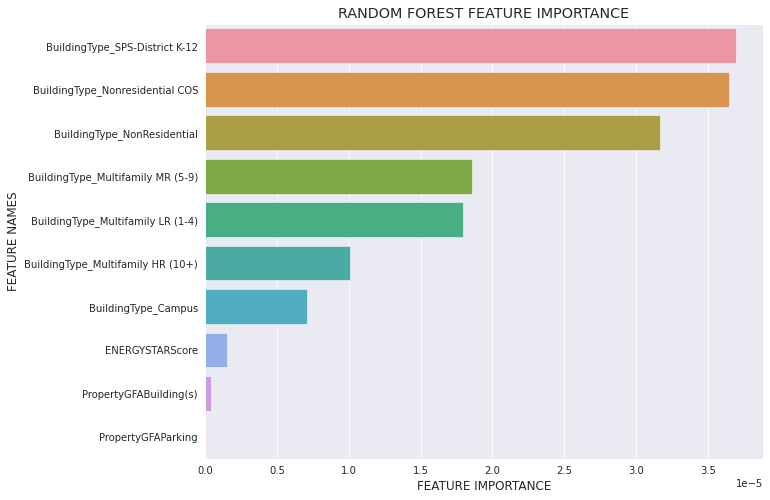

In [48]:
# features importance for random forest
plt.style.use('ggplot')
sns.set_style('darkgrid')
plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST')
plt.savefig('rffeatures.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Support Vector Regression

Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. Let’s spend a few minutes understanding the idea behind SVR.



In [49]:
from sklearn.svm import SVR

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

#call the model
svr = SVR()

# define values for hyperparameters
kernel = ['poly']
degree = [1] # linear
C = [200]

# Create the random grid
svr_grid = {'kernel': kernel, 'degree': degree, 'C': C}

# cross validation to tune hyperparameter
gsvr = GridSearchCV(svr, param_grid = svr_grid, cv=KFold(n_splits=5,shuffle=True))

# train our models with the parameters we indicated
gsvr.fit(X_train, y_train)

#Predict the response for test dataset
y_svr_test_pred = gsvr.predict(X_test)
y_svr_train_pred = gsvr.predict(X_train)

# mean error square
svr_test_mae = mean_absolute_error(y_test, y_svr_test_pred)
svr_train_mae = mean_absolute_error(y_train, y_svr_train_pred)

# best hyperparameter
gsvr_param = gsvr.best_params_

# The mean squared error
svr_test_mse = mean_squared_error(y_test, y_svr_test_pred)
svr_train_mse = mean_squared_error(y_train, y_svr_train_pred)

# The coefficient of determination: 1 is perfect prediction
svr_test_r2 = r2_score(y_test, y_svr_test_pred)
svr_train_r2 = r2_score(y_train, y_svr_train_pred)

# The root mean squared error
svr_test_rmse = sqrt(mean_squared_error(y_test, y_svr_test_pred))
svr_train_rmse = sqrt(mean_squared_error(y_train, y_svr_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
svr_time = t1_stop-t1_start

print("Elapsed time in seconds to run SVR:", svr_time) 

Elapsed time in seconds to run SVR: 1.1431865689999938


In [50]:
import optuna

def objective(trial):

    gamma = trial.suggest_categorical("gamma", choices=["auto", "scale"])
    verbose = trial.suggest_categorical("verbose", choices=[True, False])
    C = trial.suggest_float("C", 1, 100)
    epsilon = trial.suggest_float("epsilon", 0, 1)
    shrinking = trial.suggest_categorical("shrinking",choices=[True,False]) 

    ## Create Model
    
    optuna_svr = SVR(epsilon=epsilon, gamma=gamma, C=C, shrinking=shrinking, verbose=verbose)
    
    ## Fit Model
    
    optuna_svr.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_svr.predict(X_test))
    

t1_start = process_time()


study9 = optuna.create_study(study_name="SupportVectorRegressor")
study9.optimize(objective, n_trials=47)

# evaluation metrics

optuna_svr_rmse = sqrt(study9.best_value)
optuna_svr_mse = study9.best_value
optuna_svr_params = study9.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
svr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Support Vector Regressor with Optuna tuning hyperparameters:", svr_time)

print("Best Params : {}".format(optuna_svr_params))
print("\nBest MSE : {}".format(optuna_svr_mse))
print("\nBest RMSE : {}".format(optuna_svr_rmse))


[I 2022-01-31 19:03:21,869] A new study created in memory with name: SupportVectorRegressor
[I 2022-01-31 19:03:22,206] Trial 0 finished with value: 38571.14094072131 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 36.76039531432354, 'epsilon': 0.17890408148353099, 'shrinking': False}. Best is trial 0 with value: 38571.14094072131.
[I 2022-01-31 19:03:22,476] Trial 1 finished with value: 38902.40381534078 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 27.583073760139115, 'epsilon': 0.14766775701726154, 'shrinking': True}. Best is trial 0 with value: 38571.14094072131.


[LibSVM]*
optimization finished, #iter = 911
obj = -6692140.304711, rho = -386.214742
nSV = 1311, nBSV = 1305


[I 2022-01-31 19:03:23,012] Trial 2 finished with value: 27022.49173789969 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 48.55306548827074, 'epsilon': 0.04833005656240541, 'shrinking': True}. Best is trial 2 with value: 27022.49173789969.


[LibSVM].*
optimization finished, #iter = 1057
obj = -4587557.155809, rho = -351.407287
nSV = 1304, nBSV = 1297


[I 2022-01-31 19:03:23,275] Trial 3 finished with value: 27297.832719881037 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 33.09937498940918, 'epsilon': 0.20546008336793486, 'shrinking': True}. Best is trial 2 with value: 27022.49173789969.
[I 2022-01-31 19:03:23,518] Trial 4 finished with value: 39248.60201044464 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 7.892854687509391, 'epsilon': 0.8630644109116723, 'shrinking': True}. Best is trial 2 with value: 27022.49173789969.
[I 2022-01-31 19:03:23,775] Trial 5 finished with value: 26890.847286384374 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 61.8315034041728, 'epsilon': 0.5087461633525114, 'shrinking': False}. Best is trial 5 with value: 26890.847286384374.


[LibSVM]

[I 2022-01-31 19:03:24,050] Trial 6 finished with value: 26910.93807936493 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 58.619275939012034, 'epsilon': 0.24888671568244336, 'shrinking': True}. Best is trial 5 with value: 26890.847286384374.


.*
optimization finished, #iter = 1063
obj = -8037797.492165, rho = -403.308146
nSV = 1303, nBSV = 1295


[I 2022-01-31 19:03:24,306] Trial 7 finished with value: 26678.634784312624 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 79.00815048370907, 'epsilon': 0.7133592166866185, 'shrinking': True}. Best is trial 7 with value: 26678.634784312624.
[I 2022-01-31 19:03:24,563] Trial 8 finished with value: 28045.1003793826 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 17.716686026210095, 'epsilon': 0.23471369104812623, 'shrinking': True}. Best is trial 7 with value: 26678.634784312624.


[LibSVM].

[I 2022-01-31 19:03:24,938] Trial 9 finished with value: 37462.74751741047 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 79.13329018634396, 'epsilon': 0.6014014901789074, 'shrinking': False}. Best is trial 7 with value: 26678.634784312624.


..*
optimization finished, #iter = 3081
obj = -10331152.446394, rho = -51.313232
nSV = 1306, nBSV = 233


[I 2022-01-31 19:03:25,209] Trial 10 finished with value: 26613.238902050376 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 86.43902610166279, 'epsilon': 0.9636442394344831, 'shrinking': True}. Best is trial 10 with value: 26613.238902050376.
[I 2022-01-31 19:03:25,476] Trial 11 finished with value: 26527.009245781344 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 97.35026601531459, 'epsilon': 0.9938863719655999, 'shrinking': True}. Best is trial 11 with value: 26527.009245781344.
[I 2022-01-31 19:03:25,743] Trial 12 finished with value: 26516.698739373915 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 99.87843876597822, 'epsilon': 0.9924052225178176, 'shrinking': True}. Best is trial 12 with value: 26516.698739373915.
[I 2022-01-31 19:03:26,013] Trial 13 finished with value: 26526.259704249016 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 97.60833985291066, 'epsilon': 0.9958519578025127, 'shrinking': True}. Best is trial 12 with value: 2651

[LibSVM].

[I 2022-01-31 19:03:27,452] Trial 18 finished with value: 37623.66822015463 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 70.70599434213577, 'epsilon': 0.44197854375825774, 'shrinking': False}. Best is trial 12 with value: 26516.698739373915.


.*
optimization finished, #iter = 2779
obj = -9379693.338739, rho = -49.285465
nSV = 1299, nBSV = 257


[I 2022-01-31 19:03:27,717] Trial 19 finished with value: 27046.302980002267 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 47.44699637412073, 'epsilon': 0.37983990450569804, 'shrinking': True}. Best is trial 12 with value: 26516.698739373915.
[I 2022-01-31 19:03:27,987] Trial 20 finished with value: 26576.250934341795 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 88.56989158710249, 'epsilon': 0.5701523029916941, 'shrinking': True}. Best is trial 12 with value: 26516.698739373915.
[I 2022-01-31 19:03:28,254] Trial 21 finished with value: 26512.160674652834 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 99.64755151361447, 'epsilon': 0.868471108454343, 'shrinking': True}. Best is trial 21 with value: 26512.160674652834.
[I 2022-01-31 19:03:28,521] Trial 22 finished with value: 26514.186583954925 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 99.29652839107187, 'epsilon': 0.8662311239760772, 'shrinking': True}. Best is trial 21 with value: 2651

[LibSVM].

[I 2022-01-31 19:03:29,705] Trial 26 finished with value: 37813.299095147886 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 61.26027222437745, 'epsilon': 0.7369621133104473, 'shrinking': False}. Best is trial 21 with value: 26512.160674652834.


.*
optimization finished, #iter = 2987
obj = -8263560.329180, rho = -47.016042
nSV = 1303, nBSV = 279


[I 2022-01-31 19:03:29,975] Trial 27 finished with value: 26568.289654769083 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 89.46332492879688, 'epsilon': 0.6172781168384164, 'shrinking': True}. Best is trial 21 with value: 26512.160674652834.
[I 2022-01-31 19:03:30,246] Trial 28 finished with value: 26639.108302973815 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 83.4839876045539, 'epsilon': 0.7987293609561515, 'shrinking': True}. Best is trial 21 with value: 26512.160674652834.
[I 2022-01-31 19:03:30,602] Trial 29 finished with value: 37253.19056878597 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 91.88482264576429, 'epsilon': 0.91022991859697, 'shrinking': False}. Best is trial 21 with value: 26512.160674652834.
[I 2022-01-31 19:03:30,871] Trial 30 finished with value: 26724.864256782923 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 75.18009842768055, 'epsilon': 0.8013411207659509, 'shrinking': True}. Best is trial 21 with value: 26512.16

[LibSVM].

[I 2022-01-31 19:03:32,286] Trial 35 finished with value: 38308.39441098533 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 43.13387336629187, 'epsilon': 0.8242363319650432, 'shrinking': True}. Best is trial 21 with value: 26512.160674652834.


.*
optimization finished, #iter = 2756
obj = -6056825.979199, rho = -41.583134
nSV = 1293, nBSV = 341


[I 2022-01-31 19:03:32,555] Trial 36 finished with value: 27375.475888426936 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 30.045879357104603, 'epsilon': 0.025503471742350015, 'shrinking': True}. Best is trial 21 with value: 26512.160674652834.
[I 2022-01-31 19:03:32,820] Trial 37 finished with value: 26856.00549203086 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 66.22688058676172, 'epsilon': 0.9294320431971789, 'shrinking': True}. Best is trial 21 with value: 26512.160674652834.


[LibSVM]*
optimization finished, #iter = 872
obj = -3175211.067960, rho = -316.841726
nSV = 1285, nBSV = 1280


[I 2022-01-31 19:03:33,082] Trial 38 finished with value: 27503.220010958685 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 22.881099164516478, 'epsilon': 0.8455855340712297, 'shrinking': True}. Best is trial 21 with value: 26512.160674652834.
[I 2022-01-31 19:03:33,447] Trial 39 finished with value: 37945.087644800406 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 55.42948738456335, 'epsilon': 0.9415324429268589, 'shrinking': False}. Best is trial 21 with value: 26512.160674652834.
[I 2022-01-31 19:03:33,716] Trial 40 finished with value: 26528.22666000864 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 93.68011151714758, 'epsilon': 0.11259196842167662, 'shrinking': True}. Best is trial 21 with value: 26512.160674652834.
[I 2022-01-31 19:03:33,984] Trial 41 finished with value: 26513.831873637795 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 99.99954860388549, 'epsilon': 0.7525558181332102, 'shrinking': True}. Best is trial 21 with value: 2651

[LibSVM].

[I 2022-01-31 19:03:35,350] Trial 46 finished with value: 26521.41266153879 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 98.99727483042813, 'epsilon': 0.5602726618838421, 'shrinking': True}. Best is trial 21 with value: 26512.160674652834.


*
optimization finished, #iter = 1134
obj = -13415803.132234, rho = -452.229864
nSV = 1294, nBSV = 1282
Elapsed time in seconds to run Support Vector Regressor with Optuna tuning hyperparameters: 13.56443951
Best Params : {'gamma': 'scale', 'verbose': False, 'C': 99.64755151361447, 'epsilon': 0.868471108454343, 'shrinking': True}

Best MSE : 26512.160674652834

Best RMSE : 162.8255528922068


In [51]:
# cross validation

cv_svr_train = cross_val_score(gsvr, X_train, y_svr_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_svr_test = cross_val_score(gsvr, X_test, y_svr_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_svr_results = pd.DataFrame([-cv_svr_train, -cv_svr_test, -cv_dummy]).transpose()
cv_svr_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_svr_results

,Training Dataset,Test Dataset,Dummy
0,0.008264,0.008333,8.077936e-28
1,0.008321,0.007970,8.077936e-28
2,0.008464,0.007627,8.077936e-28
3,0.008235,0.008078,8.077936e-28
4,0.008315,0.008303,8.077936e-28


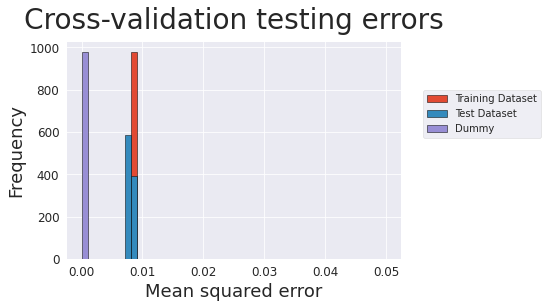

In [52]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.05, num=50)
hist = cv_svr_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [53]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
svr_results = pd.DataFrame(['SVR', svr_time, gsvr_param, optuna_svr_params, svr_train_mae, svr_test_mae, dummy_test_mae, svr_train_mse, svr_test_mse, optuna_svr_mse, dummy_test_mse, svr_train_rmse, svr_test_rmse, optuna_svr_rmse, dummy_test_rmse,  svr_train_r2, svr_test_r2, dummy_test_r2]).transpose()
svr_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results, svr_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.667699,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}",173.131158,157.622754,116.981859,342924.313713,135397.159470,120459.824665,38134.369260,585.597399,367.963530,347.073227,195.280233,0.277376,0.185920,-0.060177
1,Least Squares Regression,3.427681,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,3.892051,"{'alpha': 0.85, 'learning_rate': 0.6, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.1627452278948744, 'n_estimators': 44, 'max_features': 15, 'alpha': 0.9379066500492953, 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.022033139630568715, 'max_depth': 14, 'min_impurity_decrease': 0.6709612435089373, 'validation_fraction': 0.18541648059824545, 'n_iter_no_change': 24, 'tol': 8.125363197582672}",109.887527,128.723749,116.981859,175773.410226,252267.785918,175427.253788,38134.369260,419.253396,502.262666,418.840368,195.280233,0.587577,0.096134,-0.060177
3,Elastic Net Regression,7.691592,{'alpha': 10000},"{'fit_intercept': False, 'n_estimators': 574, 'tol': 0.41619506819564533, 'alpha': 985.9758566790616, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.6844368749226185}",164.059273,142.382032,116.981859,376825.124256,110141.216123,56267.997661,38134.369260,613.860835,331.875302,237.208764,195.280233,0.288980,-2.062046,-0.060177
4,Lasso Regression,6.827814,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.4175497061013981, 'alpha': 929.0400463700298, 'warm_start': False, 'selection': 'cyclic'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,66306.019278,38134.369260,607.457675,324.615949,257.499552,195.280233,0.303736,-1.929554,-0.060177
5,Decision Trees Regressor,0.078364,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 4, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.047021608102087636, 'max_depth': 2, 'min_impurity_decrease': 0.3639724517733421, 'splitter': 'best', 'min_samples_split': 13}",0.000000,92.847247,116.981859,0.000000,243075.120782,37417.889235,38134.369260,0.000000,493.026491,193.437042,195.280233,1.000000,-5.757754,-0.060177
6,Random Forest,5.389934,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 15, 'max_features': 2, 'max_leaf_nodes': 9, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.003478131985064206, 'max_depth': 8, 'min_impurity_decrease': 0.222113100193432, 'min_samples_split': 8, 'max_samples': 55, 'bootstrap': False}",44.058047,84.106163,116.981859,57363.583565,84875.178370,25463.226137,38134.369260,239.506959,291.333449,159.572009,195.280233,0.891762,-1.359623,-0.060177
7,SVR,13.564440,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': False, 'C': 99.64755151361447, 'epsilon': 0.868471108454343, 'shrinking': True}",104.530854,64.591326,116.981859,466213.610472,27688.119168,26512.160675,38134.369260,682.798367,166.397473,162.825553,195.280233,0.120315,0.230240,-0.060177


# Bagging for Regression

In [54]:
from sklearn.ensemble import BaggingRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# creating a RF classifier
reg_bagging = BaggingRegressor() 

# define values for hyperparameters
n_estimators = [200]
max_features = [30]
max_samples = [100]

# Create the random grid
rbag_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_samples':max_samples}

# cross validation to tune hyperparameter
g_rbag = GridSearchCV(reg_bagging, param_grid = rbag_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
reg_bagging.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_reg_bagging_test_pred = reg_bagging.predict(X_test)
y_reg_bagging_train_pred = reg_bagging.predict(X_train)

# fit the grid
g_rbag.fit(X_train, y_train)

# best hyperparameter
g_rbag_param = g_rbag.best_params_

# The mean absolute error
reg_bagging_test_mae = mean_absolute_error(y_test, y_reg_bagging_test_pred)
reg_bagging_train_mae = mean_absolute_error(y_train, y_reg_bagging_train_pred)

# The mean squared error
reg_bagging_test_mse = mean_squared_error(y_test, y_reg_bagging_test_pred)
reg_bagging_train_mse = mean_squared_error(y_train, y_reg_bagging_train_pred)

# The coefficient of determination: 1 is perfect prediction
reg_bagging_test_r2 = r2_score(y_test, y_reg_bagging_test_pred)
reg_bagging_train_r2 = r2_score(y_train, y_reg_bagging_train_pred)

# The root mean squared error
reg_bagging_test_rmse = sqrt(mean_squared_error(y_test, y_reg_bagging_test_pred))
reg_bagging_train_rmse = sqrt(mean_squared_error(y_train, y_reg_bagging_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
rbagging_time = t1_stop-t1_start

print("Elapsed time in seconds to run Bagging Regressor:", rbagging_time)

Elapsed time in seconds to run Bagging Regressor: 3.4241409340000075


In [55]:
import optuna

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1, 200)
    max_features = trial.suggest_int("max_features", 1, 30)
    max_samples = trial.suggest_int("max_samples", 1, 100)
    bootstrap = trial.suggest_categorical("bootstrap",choices=[True, False])
    bootstrap_features = trial.suggest_categorical("bootstrap_features",choices=[True, False])
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    

    ## Create Model
    
    optuna_bagging  = BaggingRegressor(n_estimators=n_estimators, max_features=max_features, max_samples=max_samples, bootstrap=bootstrap, bootstrap_features=bootstrap_features, warm_start=warm_start)
    
    ## Fit Model
    
    optuna_bagging.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_bagging.predict(X_test))
    

t1_start = process_time()


study3 = optuna.create_study(study_name="BaggingRegressor")
study3.optimize(objective, n_trials=47)

# evaluation metrics

optuna_bagging_rmse = sqrt(study3.best_value)
optuna_bagging_mse = study3.best_value
optuna_bagging_params = study3.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
bagging_time = t1_stop-t1_start

print("Elapsed time in seconds to run Bagging Regressor with Optuna tuning hyperparameters:", bagging_time)

print("Best Params : {}".format(optuna_bagging_params))
print("\nBest MSE : {}".format(optuna_bagging_mse))
print("\nBest RMSE : {}".format(optuna_bagging_rmse))


[I 2022-01-31 19:03:44,174] A new study created in memory with name: BaggingRegressor
[I 2022-01-31 19:03:44,459] Trial 0 finished with value: 32479.40273144312 and parameters: {'n_estimators': 119, 'max_features': 17, 'max_samples': 4, 'bootstrap': False, 'bootstrap_features': True, 'warm_start': True}. Best is trial 0 with value: 32479.40273144312.
[I 2022-01-31 19:03:44,904] Trial 1 finished with value: 30676.082469541376 and parameters: {'n_estimators': 189, 'max_features': 7, 'max_samples': 72, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': True}. Best is trial 1 with value: 30676.082469541376.
[I 2022-01-31 19:03:45,301] Trial 2 finished with value: 31090.623143608966 and parameters: {'n_estimators': 161, 'max_features': 10, 'max_samples': 100, 'bootstrap': True, 'bootstrap_features': True, 'warm_start': True}. Best is trial 1 with value: 30676.082469541376.
[I 2022-01-31 19:03:45,497] Trial 3 finished with value: 30145.488336161638 and parameters: {'n_estimators'

Elapsed time in seconds to run Bagging Regressor with Optuna tuning hyperparameters: 18.376773823000008
Best Params : {'n_estimators': 199, 'max_features': 27, 'max_samples': 42, 'bootstrap': True, 'bootstrap_features': False, 'warm_start': True}

Best MSE : 25822.025385538334

Best RMSE : 160.6923314459602


In [56]:
# cross validation

cv_bagging_train = cross_val_score(g_rbag, X_train, y_reg_bagging_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_bagging_test = cross_val_score(g_rbag, X_test, y_reg_bagging_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_bagging_results = pd.DataFrame([-cv_bagging_train, -cv_bagging_test, -cv_dummy]).transpose()
cv_bagging_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_bagging_results

,Training Dataset,Test Dataset,Dummy
0,243662.970370,81098.406917,8.077936e-28
1,187589.246738,76015.490577,8.077936e-28
2,19794.870193,2481.665239,8.077936e-28
3,45718.689329,5355.972063,8.077936e-28
4,238184.410905,4230.640671,8.077936e-28


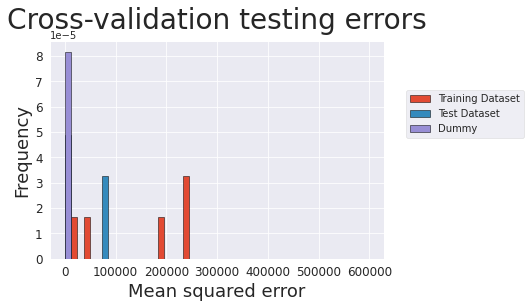

In [57]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=600000, num=50)
hist = cv_bagging_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [58]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
bagging_results = pd.DataFrame(['Bagging Regressor', rbagging_time, g_rbag_param, optuna_bagging_params, reg_bagging_train_mae, reg_bagging_test_mae, dummy_test_mae, reg_bagging_train_mse, reg_bagging_test_mse, optuna_bagging_mse, dummy_test_mse, reg_bagging_train_rmse, reg_bagging_test_rmse, optuna_bagging_rmse, dummy_test_rmse, reg_bagging_train_r2, reg_bagging_test_r2, dummy_test_r2]).transpose()
bagging_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results, svr_results, bagging_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.667699,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}",173.131158,157.622754,116.981859,342924.313713,135397.159470,120459.824665,38134.369260,585.597399,367.963530,347.073227,195.280233,0.277376,0.185920,-0.060177
1,Least Squares Regression,3.427681,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,3.892051,"{'alpha': 0.85, 'learning_rate': 0.6, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.1627452278948744, 'n_estimators': 44, 'max_features': 15, 'alpha': 0.9379066500492953, 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.022033139630568715, 'max_depth': 14, 'min_impurity_decrease': 0.6709612435089373, 'validation_fraction': 0.18541648059824545, 'n_iter_no_change': 24, 'tol': 8.125363197582672}",109.887527,128.723749,116.981859,175773.410226,252267.785918,175427.253788,38134.369260,419.253396,502.262666,418.840368,195.280233,0.587577,0.096134,-0.060177
3,Elastic Net Regression,7.691592,{'alpha': 10000},"{'fit_intercept': False, 'n_estimators': 574, 'tol': 0.41619506819564533, 'alpha': 985.9758566790616, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.6844368749226185}",164.059273,142.382032,116.981859,376825.124256,110141.216123,56267.997661,38134.369260,613.860835,331.875302,237.208764,195.280233,0.288980,-2.062046,-0.060177
4,Lasso Regression,6.827814,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.4175497061013981, 'alpha': 929.0400463700298, 'warm_start': False, 'selection': 'cyclic'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,66306.019278,38134.369260,607.457675,324.615949,257.499552,195.280233,0.303736,-1.929554,-0.060177
5,Decision Trees Regressor,0.078364,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 4, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.047021608102087636, 'max_depth': 2, 'min_impurity_decrease': 0.3639724517733421, 'splitter': 'best', 'min_samples_split': 13}",0.000000,92.847247,116.981859,0.000000,243075.120782,37417.889235,38134.369260,0.000000,493.026491,193.437042,195.280233,1.000000,-5.757754,-0.060177
6,Random Forest,5.389934,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 15, 'max_features': 2, 'max_leaf_nodes': 9, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.003478131985064206, 'max_depth': 8, 'min_impurity_decrease': 0.222113100193432, 'min_samples_split': 8, 'max_samples': 55, 'bootstrap': False}",44.058047,84.106163,116.981859,57363.583565,84875.178370,25463.226137,38134.369260,239.506959,291.333449,159.572009,195.280233,0.891762,-1.359623,-0.060177
7,SVR,13.564440,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': False, 'C': 99.64755151361447, 'epsilon': 0.868471108454343, 'shrinking': True}",104.530854,64.591326,116.981859,466213.610472,27688.119168,26512.160675,38134.369260,682.798367,166.397473,162.825553,195.280233,0.120315,0.230240,-0.060177
8,Bagging Regressor,3.424141,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}","{'n_estimators': 199, 'max_features': 27, 'max_samples': 42, 'bootstrap': True, 'bootstrap_features': False, 'warm_start': True}",55.283982,78.853286,116.981

# XGBoost

In [59]:
import xgboost as xgb
import xgboost as XGBRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# creating a gradient boost classifier
xg_boosting = xgb.XGBRegressor() 

# define values for hyperparameters
eta = [0.2] 
alpha = [0.7]
gamma = [3]
max_depth = [12]
max_leaves = [4]
min_child_weight = [3]

# Create the random grid
xgboosting_grid = {'eta': eta, 'alpha': alpha, 'gamma': gamma, 'max_depth':max_depth, 'max_leaves':max_leaves, 'min_child_weight':min_child_weight}

# cross validation to tune hyperparameter
g_xg_boosting = GridSearchCV(xg_boosting, param_grid = xgboosting_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
xg_boosting.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_xg_boosting_test_pred = xg_boosting.predict(X_test)
y_xg_boosting_train_pred = xg_boosting.predict(X_train)

# fit the grid
g_xg_boosting.fit(X_train, y_train)

# best hyperparameter
g_xgboosting_param = g_xg_boosting.best_params_

# The mean absolute error
xg_boosting_test_mae = mean_absolute_error(y_test, y_xg_boosting_test_pred)
xg_boosting_train_mae = mean_absolute_error(y_train, y_xg_boosting_train_pred)

# The mean squared error
xg_boosting_test_mse = mean_squared_error(y_test, y_xg_boosting_test_pred)
xg_boosting_train_mse = mean_squared_error(y_train, y_xg_boosting_train_pred)

# The coefficient of determination: 1 is perfect prediction
xg_boosting_test_r2 = r2_score(y_test, y_xg_boosting_test_pred)
xg_boosting_train_r2 = r2_score(y_train, y_xg_boosting_train_pred)

# The root mean squared error
xg_boosting_test_rmse = sqrt(mean_squared_error(y_test, y_xg_boosting_test_pred))
xg_boosting_train_rmse = sqrt(mean_squared_error(y_train, y_xg_boosting_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
xg_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run XGBoosting Regressor:", xg_boosting_time)

Elapsed time in seconds to run XGBoosting Regressor: 15.976748506000007


In [60]:
import optuna

def objective(trial):
    
    
    colsample_bylevel = trial.suggest_float("colsample_bylevel", 0, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0, 1)
    booster= trial.suggest_categorical("booster",choices=["gbtree", "gblinear"])
    gamma = trial.suggest_float("gamma", 0, 1000)
    learning_rate = trial.suggest_float("learning_rate", 0, 1)
    max_delta_step = trial.suggest_float("max_delta_step", 0, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 25)
    min_child_weights = trial.suggest_float("min_child_weights", 0, 100)
    n_estimators = trial.suggest_int("n_estimators", 10, 2000)
    reg_alpha = trial.suggest_float("reg_alpha", 0, 1000)
    reg_lambda = trial.suggest_float("reg_lambda", 0, 1000)
    

    ## Create Model
    
    optuna_xgboost  = xgb.XGBRegressor(n_estimators=n_estimators, reg_alpha=reg_alpha, reg_lambda=reg_lambda, colsample_bylevel=colsample_bylevel, colsample_bytree=colsample_bytree, booster=booster, gamma=gamma, max_depth=max_depth, learning_rate=learning_rate, max_delta_step=max_delta_step, min_child_weights=min_child_weights)
    
    ## Fit Model
    
    optuna_xgboost.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_xgboost.predict(X_test))
    

t1_start = process_time()


study8 = optuna.create_study(study_name="XGBoost")
study8.optimize(objective, n_trials=47)

# evaluation metrics

optuna_xgboost_rmse = sqrt(study8.best_value)
optuna_xgboost_mse = study8.best_value
optuna_xgboost_params = study8.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
xgboost_time = t1_stop-t1_start

print("Elapsed time in seconds to run XGBoost Regressor with Optuna tuning hyperparameters:", xgboost_time)

print("Best Params : {}".format(optuna_xgboost_params))
print("\nBest MSE : {}".format(optuna_xgboost_mse))
print("\nBest RMSE : {}".format(optuna_xgboost_rmse))


[I 2022-01-31 19:04:43,259] A new study created in memory with name: XGBoost


[19:04:43] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:04:47,043] Trial 0 finished with value: 105714.61899252035 and parameters: {'colsample_bylevel': 0.7482674194673455, 'colsample_bytree': 0.6116872937732487, 'booster': 'gblinear', 'gamma': 104.52962794961651, 'learning_rate': 0.016884543457641787, 'max_delta_step': 578.6914662210709, 'max_depth': 19, 'min_child_weights': 29.244334964133845, 'n_estimators': 1283, 'reg_alpha': 115.36131516169146, 'reg_lambda': 34.072909512598}. Best is trial 0 with value: 105714.61899252035.


[19:04:47] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:04:48,221] Trial 1 finished with value: 81014.15815145498 and parameters: {'colsample_bylevel': 0.02370082985863553, 'colsample_bytree': 0.8253846546089884, 'booster': 'gbtree', 'gamma': 196.32466483403687, 'learning_rate': 0.6980623160917987, 'max_delta_step': 523.1236950423695, 'max_depth': 18, 'min_child_weights': 16.546961664525163, 'n_estimators': 456, 'reg_alpha': 580.138788750338, 'reg_lambda': 109.73239893756148}. Best is trial 1 with value: 81014.15815145498.


[19:04:48] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:04:50,693] Trial 2 finished with value: 106505.09758209158 and parameters: {'colsample_bylevel': 0.279398338894266, 'colsample_bytree': 0.7577939067538981, 'booster': 'gblinear', 'gamma': 367.82773209172615, 'learning_rate': 0.20303455632194223, 'max_delta_step': 570.8558277281809, 'max_depth': 3, 'min_child_weights': 74.27782139356651, 'n_estimators': 1083, 'reg_alpha': 164.0224152254972, 'reg_lambda': 955.3728879699784}. Best is trial 1 with value: 81014.15815145498.


[19:04:50] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:04:52,244] Trial 3 finished with value: 107210.55056418966 and parameters: {'colsample_bylevel': 0.9687889887381874, 'colsample_bytree': 0.9862892730492776, 'booster': 'gblinear', 'gamma': 690.1715944728517, 'learning_rate': 0.7323381003320109, 'max_delta_step': 614.4294090074894, 'max_depth': 5, 'min_child_weights': 11.393570273922304, 'n_estimators': 619, 'reg_alpha': 784.9842650623519, 'reg_lambda': 907.6392902610166}. Best is trial 1 with value: 81014.15815145498.


[19:04:52] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:04:54,019] Trial 4 finished with value: 105710.45393031253 and parameters: {'colsample_bylevel': 0.325787083737326, 'colsample_bytree': 0.10140276171677942, 'booster': 'gblinear', 'gamma': 627.3093802498582, 'learning_rate': 0.1092316410808023, 'max_delta_step': 965.3390949608972, 'max_depth': 11, 'min_child_weights': 4.021013373884196, 'n_estimators': 768, 'reg_alpha': 905.1333181989278, 'reg_lambda': 76.1140245004296}. Best is trial 1 with value: 81014.15815145498.


[19:04:54] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:04:56,559] Trial 5 finished with value: 106485.18205759156 and parameters: {'colsample_bylevel': 0.6501018458324045, 'colsample_bytree': 0.7769445664392622, 'booster': 'gblinear', 'gamma': 789.9541698100466, 'learning_rate': 0.6201009764067831, 'max_delta_step': 15.487557930508157, 'max_depth': 14, 'min_child_weights': 57.63545348807712, 'n_estimators': 1111, 'reg_alpha': 87.01451707836705, 'reg_lambda': 998.6798119633821}. Best is trial 1 with value: 81014.15815145498.


[19:04:56] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:02,574] Trial 6 finished with value: 28943.050309337483 and parameters: {'colsample_bylevel': 0.36536361487084035, 'colsample_bytree': 0.769688725197936, 'booster': 'gbtree', 'gamma': 846.3571579430234, 'learning_rate': 0.11424821367890614, 'max_delta_step': 234.99134561434897, 'max_depth': 14, 'min_child_weights': 68.20007551914728, 'n_estimators': 1210, 'reg_alpha': 379.5039464725204, 'reg_lambda': 550.4514975937487}. Best is trial 6 with value: 28943.050309337483.


[19:05:02] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:10,088] Trial 7 finished with value: 87594.59809921891 and parameters: {'colsample_bylevel': 0.7231353730071292, 'colsample_bytree': 0.4346499167125424, 'booster': 'gbtree', 'gamma': 735.7048083216126, 'learning_rate': 0.62071038300917, 'max_delta_step': 917.5108890499669, 'max_depth': 8, 'min_child_weights': 23.845181582746033, 'n_estimators': 1865, 'reg_alpha': 45.713523118627194, 'reg_lambda': 824.1782942106034}. Best is trial 6 with value: 28943.050309337483.


[19:05:10] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:13,092] Trial 8 finished with value: 106199.15534365561 and parameters: {'colsample_bylevel': 0.09964936409545977, 'colsample_bytree': 0.1902004398665159, 'booster': 'gblinear', 'gamma': 317.5584196790734, 'learning_rate': 0.6863060944559608, 'max_delta_step': 556.132018332545, 'max_depth': 13, 'min_child_weights': 10.907337976538233, 'n_estimators': 1298, 'reg_alpha': 571.2439532589194, 'reg_lambda': 489.2609967687709}. Best is trial 6 with value: 28943.050309337483.


[19:05:13] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:17,492] Trial 9 finished with value: 105241.34820784211 and parameters: {'colsample_bylevel': 0.6690494052963959, 'colsample_bytree': 0.3961124690395714, 'booster': 'gblinear', 'gamma': 951.7433422845965, 'learning_rate': 0.551100978012508, 'max_delta_step': 780.9565421659069, 'max_depth': 2, 'min_child_weights': 56.6559875054203, 'n_estimators': 1367, 'reg_alpha': 178.75266736315854, 'reg_lambda': 74.17693758719979}. Best is trial 6 with value: 28943.050309337483.


[19:05:17] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:18,157] Trial 10 finished with value: 24265.874509226465 and parameters: {'colsample_bylevel': 0.41905724850568793, 'colsample_bytree': 0.9897092109360524, 'booster': 'gbtree', 'gamma': 971.498828592726, 'learning_rate': 0.9505300617712508, 'max_delta_step': 199.18477328234115, 'max_depth': 25, 'min_child_weights': 98.50679999431122, 'n_estimators': 92, 'reg_alpha': 383.1584778804134, 'reg_lambda': 532.7332519467253}. Best is trial 10 with value: 24265.874509226465.


[19:05:18] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:18,454] Trial 11 finished with value: 24846.338343186882 and parameters: {'colsample_bylevel': 0.43605758865831773, 'colsample_bytree': 0.981056620500262, 'booster': 'gbtree', 'gamma': 997.5340947125615, 'learning_rate': 0.9609722433646197, 'max_delta_step': 201.8106459955449, 'max_depth': 25, 'min_child_weights': 99.30063572388426, 'n_estimators': 35, 'reg_alpha': 338.1828639032987, 'reg_lambda': 549.6095925037985}. Best is trial 10 with value: 24265.874509226465.


[19:05:18] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:19,214] Trial 12 finished with value: 24525.295870783935 and parameters: {'colsample_bylevel': 0.516400814525822, 'colsample_bytree': 0.9807394290275913, 'booster': 'gbtree', 'gamma': 998.1664466293869, 'learning_rate': 0.9826816296223383, 'max_delta_step': 253.9608756246507, 'max_depth': 25, 'min_child_weights': 97.66917194416527, 'n_estimators': 98, 'reg_alpha': 375.87318245705666, 'reg_lambda': 528.2586870866116}. Best is trial 10 with value: 24265.874509226465.


[19:05:19] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:19,782] Trial 13 finished with value: 39498.27971663952 and parameters: {'colsample_bylevel': 0.5384971059049477, 'colsample_bytree': 0.5996683593128745, 'booster': 'gbtree', 'gamma': 530.6917015214442, 'learning_rate': 0.9810099892306025, 'max_delta_step': 278.32705616417985, 'max_depth': 25, 'min_child_weights': 99.57384254636276, 'n_estimators': 91, 'reg_alpha': 391.6517837085132, 'reg_lambda': 374.00456777186525}. Best is trial 10 with value: 24265.874509226465.


[19:05:19] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:21,258] Trial 14 finished with value: 37772.3276710814 and parameters: {'colsample_bylevel': 0.19519426724225108, 'colsample_bytree': 0.8839065039396107, 'booster': 'gbtree', 'gamma': 893.1079437809324, 'learning_rate': 0.8651960264075587, 'max_delta_step': 374.8240888656179, 'max_depth': 21, 'min_child_weights': 84.86300334580018, 'n_estimators': 339, 'reg_alpha': 686.0423605097121, 'reg_lambda': 697.889060943211}. Best is trial 10 with value: 24265.874509226465.


[19:05:21] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:22,627] Trial 15 finished with value: 26882.617713026502 and parameters: {'colsample_bylevel': 0.5248715786439259, 'colsample_bytree': 0.5939525425484611, 'booster': 'gbtree', 'gamma': 557.7768832662899, 'learning_rate': 0.3494699758853105, 'max_delta_step': 45.44881180260509, 'max_depth': 20, 'min_child_weights': 84.32754292916889, 'n_estimators': 246, 'reg_alpha': 282.88147760207744, 'reg_lambda': 331.7232657279625}. Best is trial 10 with value: 24265.874509226465.


[19:05:22] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:29,652] Trial 16 finished with value: 21021.44727540382 and parameters: {'colsample_bylevel': 0.8582179433266777, 'colsample_bytree': 0.999310978113342, 'booster': 'gbtree', 'gamma': 994.4300046605107, 'learning_rate': 0.8182874588900595, 'max_delta_step': 394.16518806263116, 'max_depth': 23, 'min_child_weights': 85.12018975465273, 'n_estimators': 763, 'reg_alpha': 464.77296042338844, 'reg_lambda': 707.4405830581362}. Best is trial 16 with value: 21021.44727540382.


[19:05:29] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:36,285] Trial 17 finished with value: 28132.733863202142 and parameters: {'colsample_bylevel': 0.9592582934499971, 'colsample_bytree': 0.8771448480407263, 'booster': 'gbtree', 'gamma': 821.312411097962, 'learning_rate': 0.8165297773097346, 'max_delta_step': 399.79044530659576, 'max_depth': 22, 'min_child_weights': 41.281105184657775, 'n_estimators': 801, 'reg_alpha': 501.9967455896487, 'reg_lambda': 737.9916748727503}. Best is trial 16 with value: 21021.44727540382.


[19:05:36] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:42,232] Trial 18 finished with value: 97897.73268546902 and parameters: {'colsample_bylevel': 0.8405905412658887, 'colsample_bytree': 0.2969850462702879, 'booster': 'gbtree', 'gamma': 358.52184349272295, 'learning_rate': 0.4450419186980533, 'max_delta_step': 123.89906743081951, 'max_depth': 17, 'min_child_weights': 82.69387706329078, 'n_estimators': 1575, 'reg_alpha': 682.5402375661985, 'reg_lambda': 675.3508576849291}. Best is trial 16 with value: 21021.44727540382.


[19:05:42] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:46,243] Trial 19 finished with value: 53283.94387494027 and parameters: {'colsample_bylevel': 0.8409634352590034, 'colsample_bytree': 0.6741487043971175, 'booster': 'gbtree', 'gamma': 893.4415167727104, 'learning_rate': 0.8538057911697522, 'max_delta_step': 384.6167817227065, 'max_depth': 22, 'min_child_weights': 70.4178288709424, 'n_estimators': 559, 'reg_alpha': 269.1964165935947, 'reg_lambda': 213.16004809741355}. Best is trial 16 with value: 21021.44727540382.


[19:05:46] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:51,200] Trial 20 finished with value: 25895.6050779355 and parameters: {'colsample_bylevel': 0.5980030306068673, 'colsample_bytree': 0.9084046122303964, 'booster': 'gbtree', 'gamma': 5.183518646174036, 'learning_rate': 0.8124865686568865, 'max_delta_step': 695.0901822180256, 'max_depth': 16, 'min_child_weights': 43.64062958854574, 'n_estimators': 806, 'reg_alpha': 995.7332141296131, 'reg_lambda': 622.699353599272}. Best is trial 16 with value: 21021.44727540382.


[19:05:51] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:52,592] Trial 21 finished with value: 23634.766578597144 and parameters: {'colsample_bylevel': 0.44887275207812716, 'colsample_bytree': 0.9983086809159722, 'booster': 'gbtree', 'gamma': 990.2699979128072, 'learning_rate': 0.930459731090383, 'max_delta_step': 313.66733204906825, 'max_depth': 24, 'min_child_weights': 93.09930576920745, 'n_estimators': 221, 'reg_alpha': 460.3797548655183, 'reg_lambda': 378.4843872141275}. Best is trial 16 with value: 21021.44727540382.


[19:05:52] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:54,320] Trial 22 finished with value: 24447.20887673656 and parameters: {'colsample_bylevel': 0.41237447423543894, 'colsample_bytree': 0.9248086716411672, 'booster': 'gbtree', 'gamma': 913.2290141792345, 'learning_rate': 0.8879834263088243, 'max_delta_step': 330.05016212416865, 'max_depth': 23, 'min_child_weights': 90.20564729630993, 'n_estimators': 296, 'reg_alpha': 471.10081158241235, 'reg_lambda': 365.16607327804746}. Best is trial 16 with value: 21021.44727540382.


[19:05:54] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:56,662] Trial 23 finished with value: 35831.07176568844 and parameters: {'colsample_bylevel': 0.4495179450693778, 'colsample_bytree': 0.8410446664570864, 'booster': 'gbtree', 'gamma': 727.1682765226167, 'learning_rate': 0.7706781441790835, 'max_delta_step': 125.04220394803394, 'max_depth': 23, 'min_child_weights': 77.92689660596209, 'n_estimators': 443, 'reg_alpha': 534.2300389376089, 'reg_lambda': 436.8435662579881}. Best is trial 16 with value: 21021.44727540382.


[19:05:56] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:05:57,660] Trial 24 finished with value: 58516.74738250801 and parameters: {'colsample_bylevel': 0.22275937347923108, 'colsample_bytree': 0.7161774116666968, 'booster': 'gbtree', 'gamma': 798.8577611049459, 'learning_rate': 0.8995897039102687, 'max_delta_step': 138.59266423006773, 'max_depth': 20, 'min_child_weights': 91.63672911803532, 'n_estimators': 225, 'reg_alpha': 448.1586220536041, 'reg_lambda': 250.6309350713345}. Best is trial 16 with value: 21021.44727540382.


[19:05:57] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:03,195] Trial 25 finished with value: 25058.907903360756 and parameters: {'colsample_bylevel': 0.5884635818008447, 'colsample_bytree': 0.9931231030835495, 'booster': 'gbtree', 'gamma': 650.400033581983, 'learning_rate': 0.9305537448901937, 'max_delta_step': 454.64314086127945, 'max_depth': 24, 'min_child_weights': 65.01813401664582, 'n_estimators': 875, 'reg_alpha': 648.7667437899129, 'reg_lambda': 776.3319812148444}. Best is trial 16 with value: 21021.44727540382.


[19:06:03] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:06,599] Trial 26 finished with value: 74498.51983169933 and parameters: {'colsample_bylevel': 0.8209738855255355, 'colsample_bytree': 0.5045070549975806, 'booster': 'gbtree', 'gamma': 928.9656416321283, 'learning_rate': 0.9989491866237489, 'max_delta_step': 462.75917549210914, 'max_depth': 16, 'min_child_weights': 92.01740806983916, 'n_estimators': 628, 'reg_alpha': 287.44021167747735, 'reg_lambda': 634.9711272368709}. Best is trial 16 with value: 21021.44727540382.


[19:06:06] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:10,574] Trial 27 finished with value: 32030.32059734436 and parameters: {'colsample_bylevel': 0.2947750522270689, 'colsample_bytree': 0.9324917474903323, 'booster': 'gbtree', 'gamma': 997.417218557197, 'learning_rate': 0.7807555759232423, 'max_delta_step': 286.6939699059769, 'max_depth': 10, 'min_child_weights': 78.39797138916666, 'n_estimators': 946, 'reg_alpha': 435.9113826675733, 'reg_lambda': 847.0703923564529}. Best is trial 16 with value: 21021.44727540382.


[19:06:10] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:11,579] Trial 28 finished with value: 24566.682720518373 and parameters: {'colsample_bylevel': 0.3959487738372215, 'colsample_bytree': 0.8260256643002999, 'booster': 'gbtree', 'gamma': 854.256909943985, 'learning_rate': 0.33618691440782644, 'max_delta_step': 189.40685138439255, 'max_depth': 21, 'min_child_weights': 89.87849704617778, 'n_estimators': 170, 'reg_alpha': 607.9444292332091, 'reg_lambda': 470.08067261163717}. Best is trial 16 with value: 21021.44727540382.


[19:06:11] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:12,622] Trial 29 finished with value: 35375.5720559764 and parameters: {'colsample_bylevel': 0.7604722028480134, 'colsample_bytree': 0.0017437928645316347, 'booster': 'gbtree', 'gamma': 442.22545962180055, 'learning_rate': 0.6306377257262282, 'max_delta_step': 349.72989639096886, 'max_depth': 19, 'min_child_weights': 62.04577879595494, 'n_estimators': 395, 'reg_alpha': 748.080616658847, 'reg_lambda': 284.2946056909361}. Best is trial 16 with value: 21021.44727540382.
[I 2022-01-31 19:06:12,765] Trial 30 finished with value: 26996.474139695045 and parameters: {'colsample_bylevel': 0.1829521983383438, 'colsample_bytree': 0.6688126368055207, 'booster': 'gbtree', 'gamma': 758.2768658248626, 'learning_rate': 0.5318871947219235, 'max_delta_step': 433.6040802247413, 'max_depth': 23, 'min_child_weights': 50.306465559168, 'n_estimators': 19, 'reg_alpha': 235.8443362175095, 'reg_lambda': 601.1121737158902}. Best is trial 16 with value: 21021.44727540382.


[19:06:12] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:06:12] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:14,507] Trial 31 finished with value: 27650.44538819246 and parameters: {'colsample_bylevel': 0.4415543237934821, 'colsample_bytree': 0.931579619867835, 'booster': 'gbtree', 'gamma': 933.6693346940556, 'learning_rate': 0.8976416790485832, 'max_delta_step': 325.85211902124234, 'max_depth': 23, 'min_child_weights': 91.38024982042175, 'n_estimators': 287, 'reg_alpha': 468.4423430381659, 'reg_lambda': 413.4311268617917}. Best is trial 16 with value: 21021.44727540382.


[19:06:14] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:16,763] Trial 32 finished with value: 37848.20449894257 and parameters: {'colsample_bylevel': 0.37205422238946506, 'colsample_bytree': 0.9142955620728197, 'booster': 'gbtree', 'gamma': 893.3658011197804, 'learning_rate': 0.9047682399662043, 'max_delta_step': 314.49340046681556, 'max_depth': 19, 'min_child_weights': 86.72692835415266, 'n_estimators': 492, 'reg_alpha': 518.0375463135028, 'reg_lambda': 163.46055670489156}. Best is trial 16 with value: 21021.44727540382.


[19:06:16] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:19,174] Trial 33 finished with value: 34745.86468552937 and parameters: {'colsample_bylevel': 0.47397788568118887, 'colsample_bytree': 0.8401343369795361, 'booster': 'gbtree', 'gamma': 932.1482391042346, 'learning_rate': 0.8426934543078675, 'max_delta_step': 507.3601744662905, 'max_depth': 24, 'min_child_weights': 76.54527173226097, 'n_estimators': 363, 'reg_alpha': 428.571547115082, 'reg_lambda': 362.1552036590655}. Best is trial 16 with value: 21021.44727540382.


[19:06:19] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:23,144] Trial 34 finished with value: 41495.181505474735 and parameters: {'colsample_bylevel': 0.24813093419384835, 'colsample_bytree': 0.9478903024922389, 'booster': 'gbtree', 'gamma': 852.5393286287834, 'learning_rate': 0.7073513650889194, 'max_delta_step': 631.8120009586391, 'max_depth': 21, 'min_child_weights': 94.34203435629779, 'n_estimators': 630, 'reg_alpha': 339.07374877454293, 'reg_lambda': 294.18087566120124}. Best is trial 16 with value: 21021.44727540382.


[19:06:23] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:23,667] Trial 35 finished with value: 106038.5407427827 and parameters: {'colsample_bylevel': 0.33813225289934684, 'colsample_bytree': 0.9980921925917363, 'booster': 'gblinear', 'gamma': 154.31333437794024, 'learning_rate': 0.744129366127138, 'max_delta_step': 192.64622463190767, 'max_depth': 25, 'min_child_weights': 82.08895810217787, 'n_estimators': 197, 'reg_alpha': 558.410605510577, 'reg_lambda': 418.2748464291831}. Best is trial 16 with value: 21021.44727540382.


[19:06:23] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:26,041] Trial 36 finished with value: 44022.859906163445 and parameters: {'colsample_bylevel': 0.5789132684762331, 'colsample_bytree': 0.7977058815095986, 'booster': 'gbtree', 'gamma': 955.9547538896232, 'learning_rate': 0.922652082223327, 'max_delta_step': 73.09193902226764, 'max_depth': 5, 'min_child_weights': 72.60393454445972, 'n_estimators': 679, 'reg_alpha': 484.27451296322454, 'reg_lambda': 578.5536426646888}. Best is trial 16 with value: 21021.44727540382.


[19:06:26] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:27,154] Trial 37 finished with value: 105283.84620291201 and parameters: {'colsample_bylevel': 0.1428392270973533, 'colsample_bytree': 0.8759477983334911, 'booster': 'gblinear', 'gamma': 613.1021678367241, 'learning_rate': 0.8010999841657017, 'max_delta_step': 247.0952552143759, 'max_depth': 18, 'min_child_weights': 95.64511454821559, 'n_estimators': 459, 'reg_alpha': 195.06726296627892, 'reg_lambda': 174.81153870046558}. Best is trial 16 with value: 21021.44727540382.


[19:06:27] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:28,066] Trial 38 finished with value: 38555.00269339566 and parameters: {'colsample_bylevel': 0.4003882538627241, 'colsample_bytree': 0.7343756964674703, 'booster': 'gbtree', 'gamma': 783.6041316466353, 'learning_rate': 0.8629019134069815, 'max_delta_step': 323.0378235688566, 'max_depth': 23, 'min_child_weights': 88.88865181355717, 'n_estimators': 167, 'reg_alpha': 616.893380545858, 'reg_lambda': 476.3965637883631}. Best is trial 16 with value: 21021.44727540382.


[19:06:28] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:30,508] Trial 39 finished with value: 106574.59769496843 and parameters: {'colsample_bylevel': 0.2953510953397046, 'colsample_bytree': 0.9338931150837528, 'booster': 'gblinear', 'gamma': 266.20160096991174, 'learning_rate': 0.7023732422835275, 'max_delta_step': 416.8145142047862, 'max_depth': 22, 'min_child_weights': 80.52505016855983, 'n_estimators': 1049, 'reg_alpha': 337.64726922953463, 'reg_lambda': 870.2957169454564}. Best is trial 16 with value: 21021.44727540382.


[19:06:30] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:34,778] Trial 40 finished with value: 84092.87392177735 and parameters: {'colsample_bylevel': 0.05572573408445114, 'colsample_bytree': 0.8614948434381794, 'booster': 'gbtree', 'gamma': 688.8482014574756, 'learning_rate': 0.9432864112704313, 'max_delta_step': 533.680174128285, 'max_depth': 24, 'min_child_weights': 99.86967613067303, 'n_estimators': 1521, 'reg_alpha': 761.5235850831297, 'reg_lambda': 766.8517830100204}. Best is trial 16 with value: 21021.44727540382.


[19:06:34] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:35,701] Trial 41 finished with value: 23926.483618844155 and parameters: {'colsample_bylevel': 0.5043469471360673, 'colsample_bytree': 0.9901502354199775, 'booster': 'gbtree', 'gamma': 994.9748358380556, 'learning_rate': 0.9777248726982652, 'max_delta_step': 243.33805611075147, 'max_depth': 25, 'min_child_weights': 95.98588132130403, 'n_estimators': 122, 'reg_alpha': 398.10424594942737, 'reg_lambda': 529.462526594841}. Best is trial 16 with value: 21021.44727540382.


[19:06:35] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:38,629] Trial 42 finished with value: 22440.60043679 and parameters: {'colsample_bylevel': 0.9271970082347027, 'colsample_bytree': 0.9558546726159657, 'booster': 'gbtree', 'gamma': 889.0409722462288, 'learning_rate': 0.9417575890049352, 'max_delta_step': 163.8316352732117, 'max_depth': 24, 'min_child_weights': 87.16920809635192, 'n_estimators': 312, 'reg_alpha': 421.6033764823445, 'reg_lambda': 528.7925303635952}. Best is trial 16 with value: 21021.44727540382.
[I 2022-01-31 19:06:38,783] Trial 43 finished with value: 24716.640438746268 and parameters: {'colsample_bylevel': 0.9433751768589004, 'colsample_bytree': 0.9680706880331834, 'booster': 'gbtree', 'gamma': 997.3862798741949, 'learning_rate': 0.950394617844221, 'max_delta_step': 165.91563389558496, 'max_depth': 25, 'min_child_weights': 32.06093000448561, 'n_estimators': 10, 'reg_alpha': 413.02603246041497, 'reg_lambda': 517.7925212823378}. Best is trial 16 with value: 21021.44727540382.


[19:06:38] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:06:38] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:43,811] Trial 44 finished with value: 35885.89717808836 and parameters: {'colsample_bylevel': 0.9266661909697177, 'colsample_bytree': 0.7831057865671163, 'booster': 'gbtree', 'gamma': 839.798616368634, 'learning_rate': 0.9948649813802419, 'max_delta_step': 226.2824171274395, 'max_depth': 24, 'min_child_weights': 95.36096541371329, 'n_estimators': 541, 'reg_alpha': 127.31272450184827, 'reg_lambda': 691.3367382827239}. Best is trial 16 with value: 21021.44727540382.


[19:06:43] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:45,069] Trial 45 finished with value: 18770.805758435312 and parameters: {'colsample_bylevel': 0.996219794518511, 'colsample_bytree': 0.9884462658707522, 'booster': 'gbtree', 'gamma': 958.0486723334832, 'learning_rate': 0.9224920199672748, 'max_delta_step': 89.56182531346337, 'max_depth': 20, 'min_child_weights': 85.80234806955521, 'n_estimators': 125, 'reg_alpha': 355.25852941159377, 'reg_lambda': 551.6691257499987}. Best is trial 45 with value: 18770.805758435312.


[19:06:45] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-31 19:06:45,484] Trial 46 finished with value: 106215.90215919708 and parameters: {'colsample_bylevel': 0.8888219716365588, 'colsample_bytree': 0.9979420328317276, 'booster': 'gblinear', 'gamma': 954.5614004554346, 'learning_rate': 0.6632648438114699, 'max_delta_step': 81.35010362442637, 'max_depth': 20, 'min_child_weights': 74.05802776371054, 'n_estimators': 146, 'reg_alpha': 335.8504524074919, 'reg_lambda': 654.2945464400191}. Best is trial 45 with value: 18770.805758435312.


Elapsed time in seconds to run XGBoost Regressor with Optuna tuning hyperparameters: 453.6002651470001
Best Params : {'colsample_bylevel': 0.996219794518511, 'colsample_bytree': 0.9884462658707522, 'booster': 'gbtree', 'gamma': 958.0486723334832, 'learning_rate': 0.9224920199672748, 'max_delta_step': 89.56182531346337, 'max_depth': 20, 'min_child_weights': 85.80234806955521, 'n_estimators': 125, 'reg_alpha': 355.25852941159377, 'reg_lambda': 551.6691257499987}

Best MSE : 18770.805758435312

Best RMSE : 137.0065902007466


In [61]:
# cross validation

cv_xg_boosting_train = cross_val_score(g_xg_boosting, X_train, y_xg_boosting_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_xg_boosting_test = cross_val_score(g_xg_boosting, X_test, y_xg_boosting_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_xg_boosting_results = pd.DataFrame([-cv_xg_boosting_train, -cv_xg_boosting_test, -cv_dummy]).transpose()
cv_xg_boosting_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_xg_boosting_results

,Training Dataset,Test Dataset,Dummy
0,3.727651e+05,265717.968750,8.077936e-28
1,1.086674e+06,92141.179688,8.077936e-28
2,7.048931e+04,18987.630859,8.077936e-28
3,5.792121e+05,2315.714111,8.077936e-28
4,6.076688e+05,29752.837891,8.077936e-28


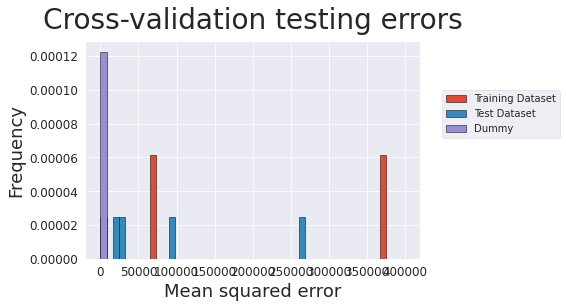

In [62]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=400000, num=50)
hist = cv_xg_boosting_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [63]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
xg_boosting_results = pd.DataFrame(['XGBoost', xg_boosting_time, g_xgboosting_param, optuna_xgboost_params, xg_boosting_train_mae, xg_boosting_test_mae, dummy_test_mae, xg_boosting_train_mse, xg_boosting_test_mse, optuna_xgboost_mse, dummy_test_mse, xg_boosting_train_rmse, xg_boosting_test_rmse, optuna_xgboost_rmse, dummy_test_rmse, xg_boosting_train_r2, xg_boosting_test_r2, dummy_test_r2]).transpose()
xg_boosting_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results, svr_results, bagging_results, xg_boosting_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.667699,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.14389983573598625, 'alpha': 141.34808183042148, 'solver': 'saga'}",173.131158,157.622754,116.981859,342924.313713,135397.159470,120459.824665,38134.369260,585.597399,367.963530,347.073227,195.280233,0.277376,0.185920,-0.060177
1,Least Squares Regression,3.427681,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,3.892051,"{'alpha': 0.85, 'learning_rate': 0.6, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.1627452278948744, 'n_estimators': 44, 'max_features': 15, 'alpha': 0.9379066500492953, 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.022033139630568715, 'max_depth': 14, 'min_impurity_decrease': 0.6709612435089373, 'validation_fraction': 0.18541648059824545, 'n_iter_no_change': 24, 'tol': 8.125363197582672}",109.887527,128.723749,116.981859,175773.410226,252267.785918,175427.253788,38134.369260,419.253396,502.262666,418.840368,195.280233,0.587577,0.096134,-0.060177
3,Elastic Net Regression,7.691592,{'alpha': 10000},"{'fit_intercept': False, 'n_estimators': 574, 'tol': 0.41619506819564533, 'alpha': 985.9758566790616, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.6844368749226185}",164.059273,142.382032,116.981859,376825.124256,110141.216123,56267.997661,38134.369260,613.860835,331.875302,237.208764,195.280233,0.288980,-2.062046,-0.060177
4,Lasso Regression,6.827814,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 1, 'tol': 0.4175497061013981, 'alpha': 929.0400463700298, 'warm_start': False, 'selection': 'cyclic'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,66306.019278,38134.369260,607.457675,324.615949,257.499552,195.280233,0.303736,-1.929554,-0.060177
5,Decision Trees Regressor,0.078364,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 4, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.047021608102087636, 'max_depth': 2, 'min_impurity_decrease': 0.3639724517733421, 'splitter': 'best', 'min_samples_split': 13}",0.000000,92.847247,116.981859,0.000000,243075.120782,37417.889235,38134.369260,0.000000,493.026491,193.437042,195.280233,1.000000,-5.757754,-0.060177
6,Random Forest,5.389934,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 15, 'max_features': 2, 'max_leaf_nodes': 9, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.003478131985064206, 'max_depth': 8, 'min_impurity_decrease': 0.222113100193432, 'min_samples_split': 8, 'max_samples': 55, 'bootstrap': False}",44.058047,84.106163,116.981859,57363.583565,84875.178370,25463.226137,38134.369260,239.506959,291.333449,159.572009,195.280233,0.891762,-1.359623,-0.060177
7,SVR,13.564440,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': False, 'C': 99.64755151361447, 'epsilon': 0.868471108454343, 'shrinking': True}",104.530854,64.591326,116.981859,466213.610472,27688.119168,26512.160675,38134.369260,682.798367,166.397473,162.825553,195.280233,0.120315,0.230240,-0.060177
8,Bagging Regressor,3.424141,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}","{'n_estimators': 199, 'max_features': 27, 'max_samples': 42, 'bootstrap': True, 'bootstrap_features': False, 'warm_start': True}",55.283982,78.853286,116.981

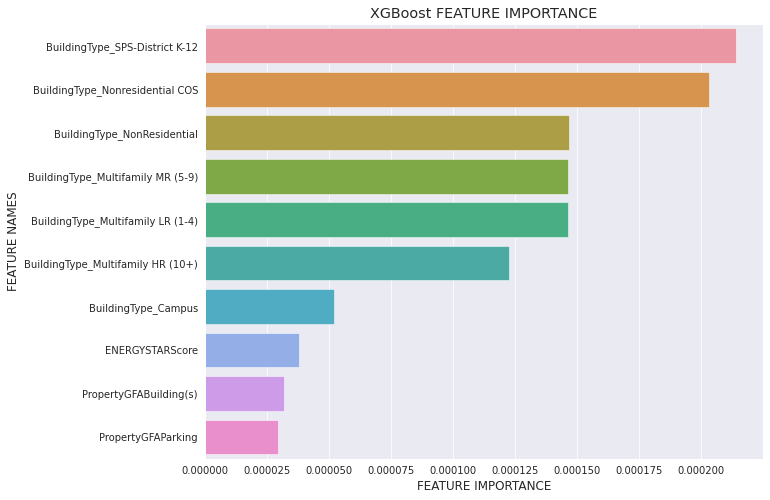

In [64]:
# features importance for random forest
plt.style.use('ggplot')
sns.set_style('darkgrid')
plot_feature_importance(xg_boosting.feature_importances_,X.columns,'XGBoost')
plt.savefig('xgboostfeatures.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Statistical Results

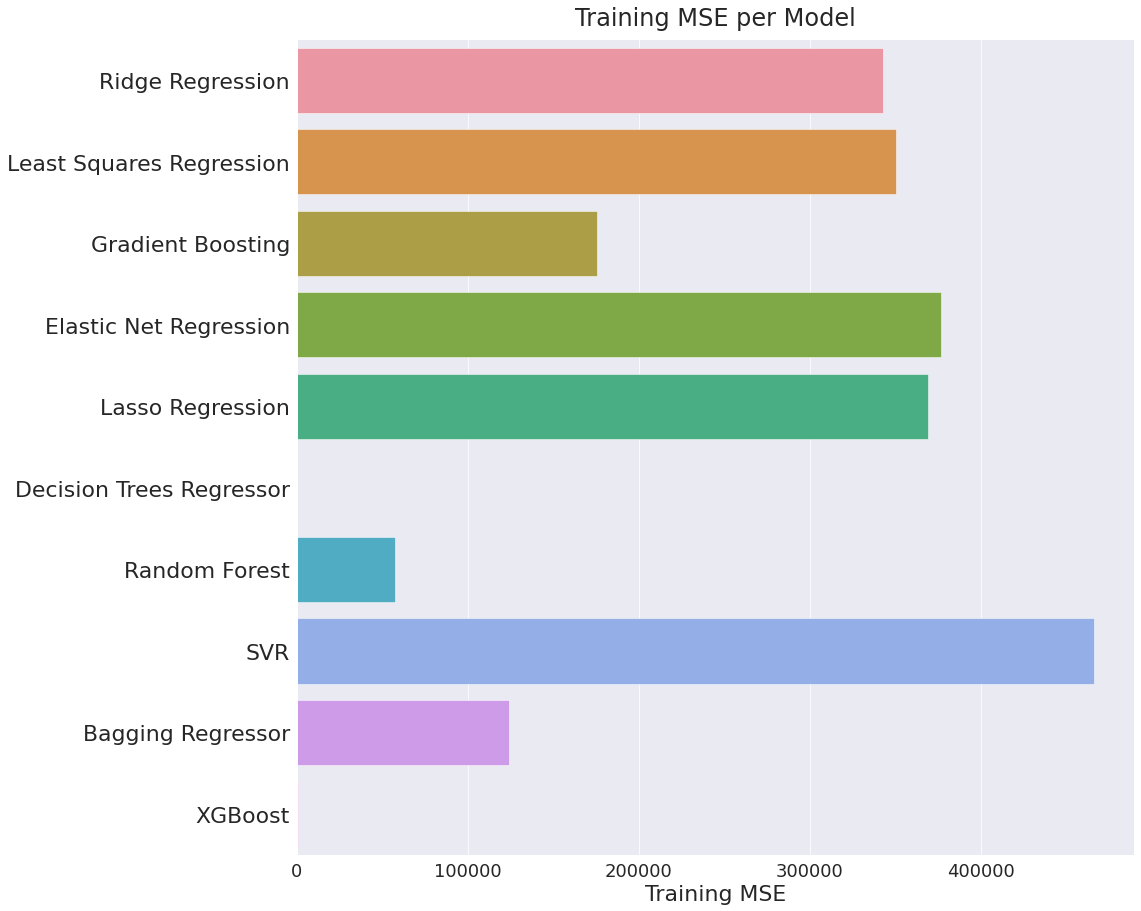

In [65]:
# Training MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training MSE per Model", size=24, y=1.01)
plt.xlabel("Training MSE", size=22)
plt.savefig('msetrain.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

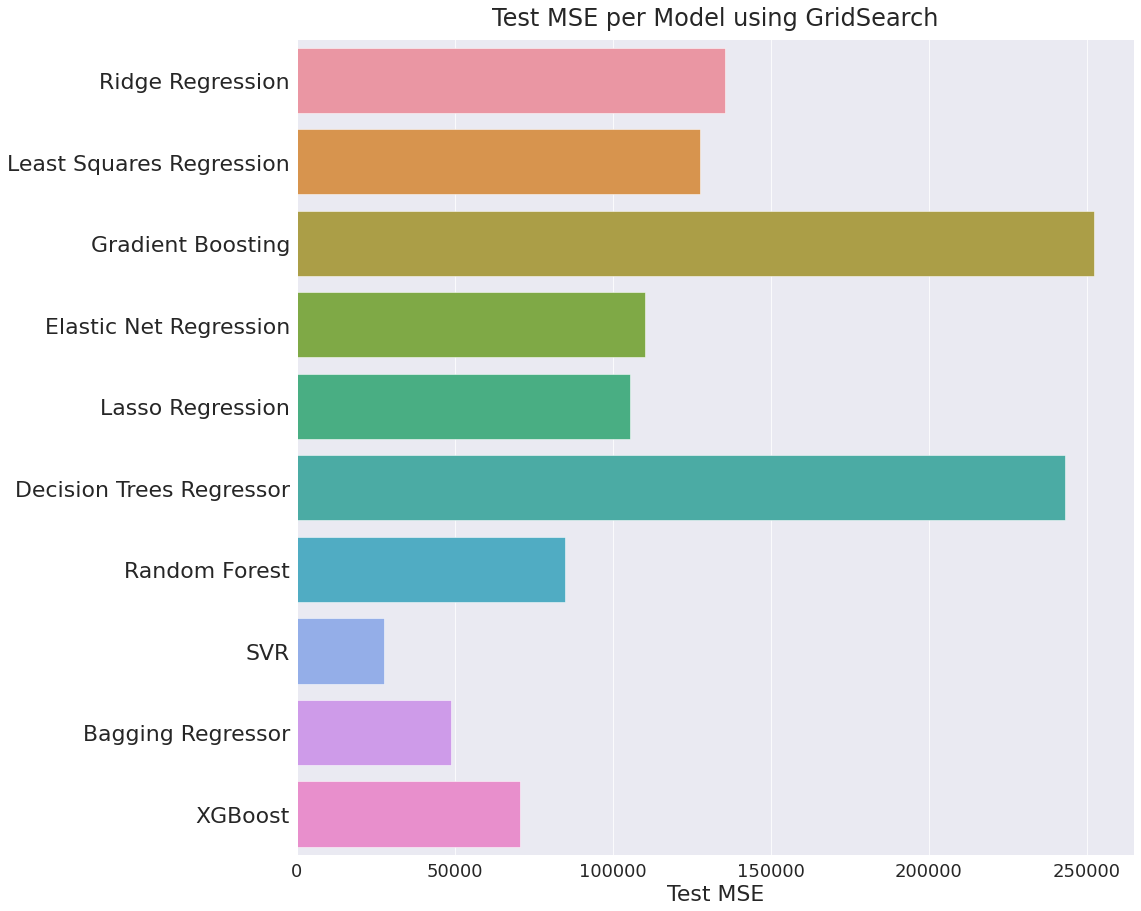

In [66]:
# Test MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test MSE per Model using GridSearch", size=24, y=1.01)
plt.xlabel("Test MSE", size=22)
plt.savefig('msetestgrid.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

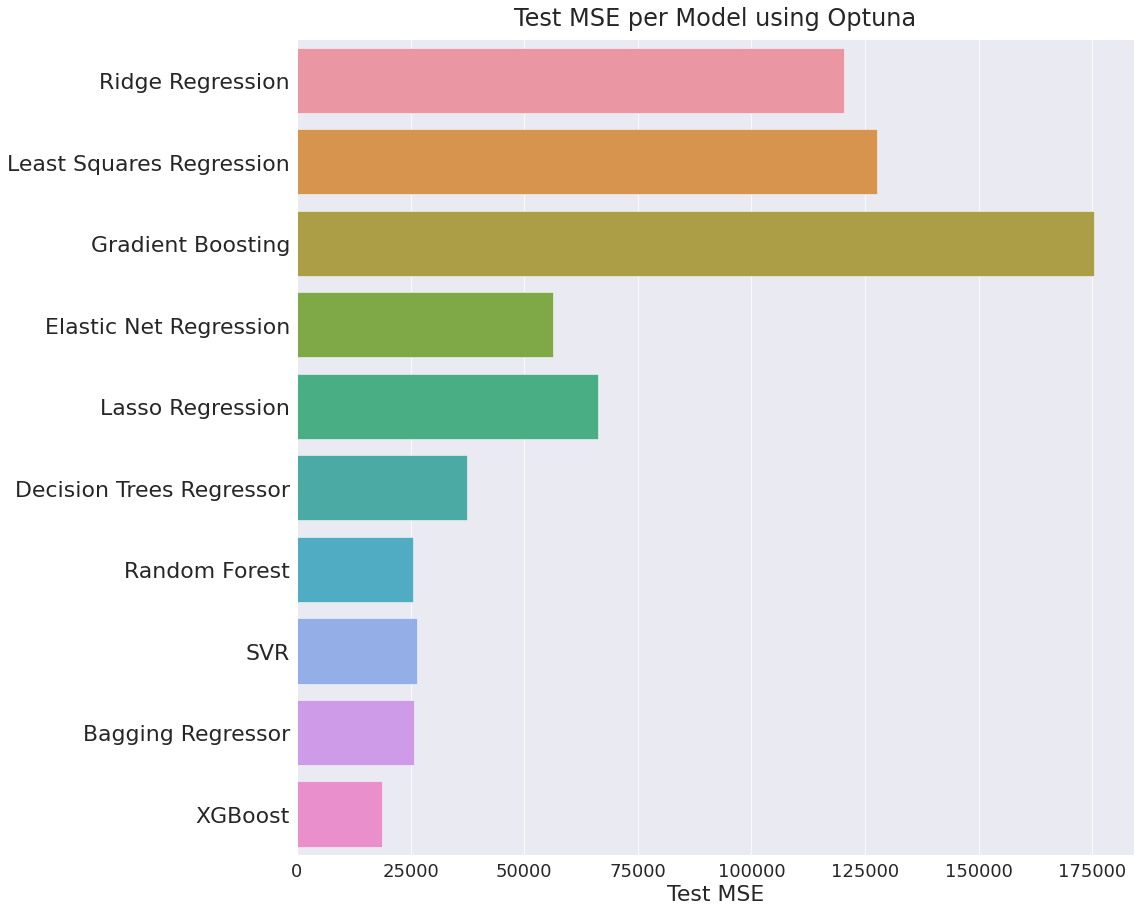

In [67]:
# Test MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Optuna Test MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test MSE per Model using Optuna", size=24, y=1.01)
plt.xlabel("Test MSE", size=22)
plt.savefig('msetestoptuna.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

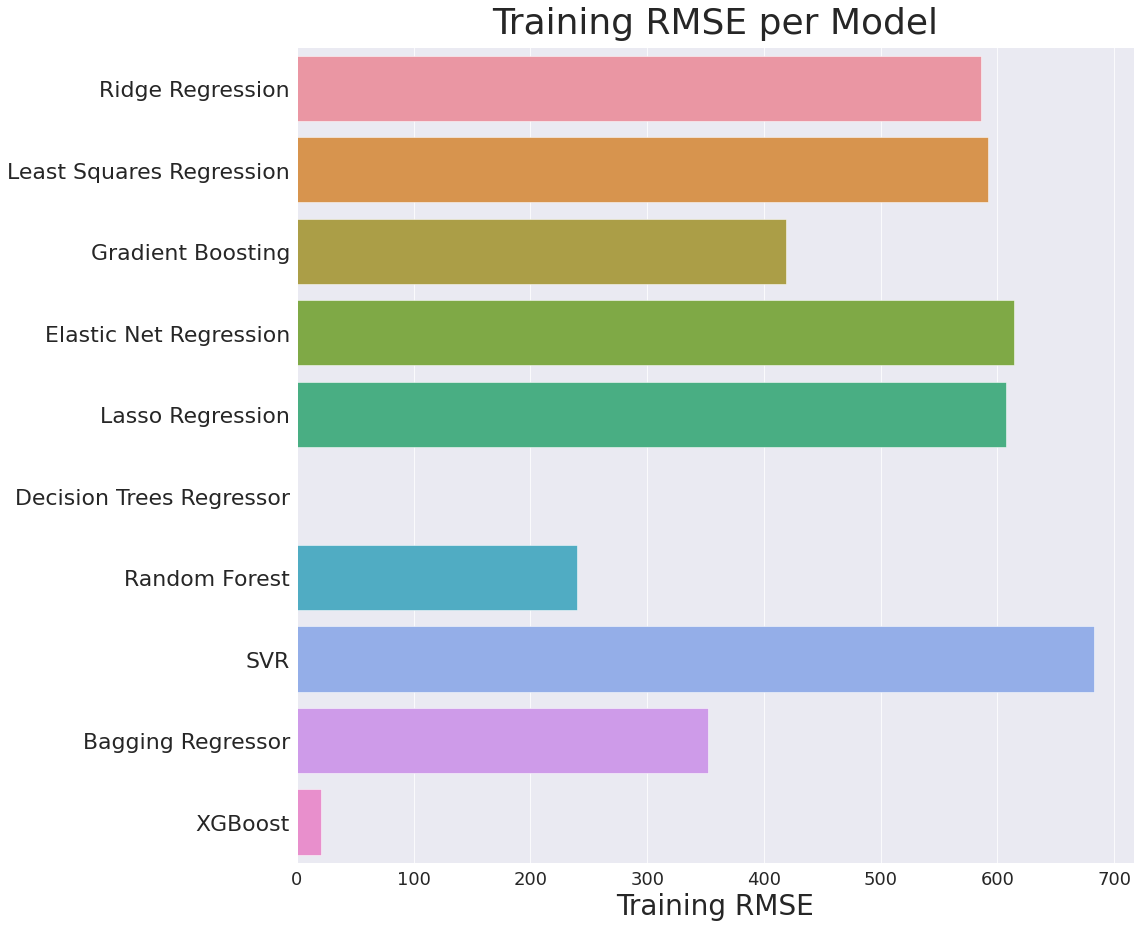

In [68]:
# Training RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training RMSE per Model", size=36, y=1.01)
plt.xlabel("Training RMSE", size=28)
plt.savefig('rmsetrain.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

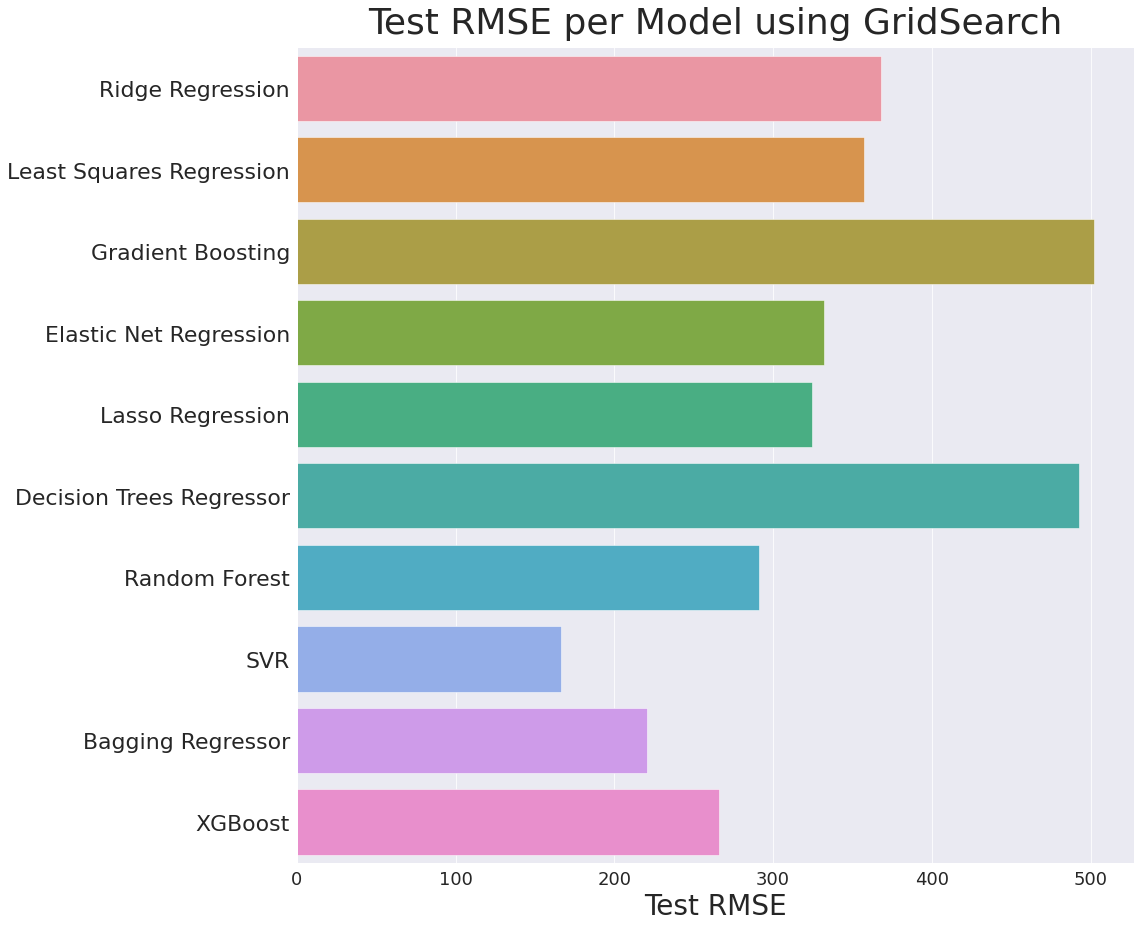

In [69]:
# Test RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test RMSE per Model using GridSearch", size=36, y=1.01)
plt.xlabel("Test RMSE", size=28)
plt.savefig('rmsetestgrid.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

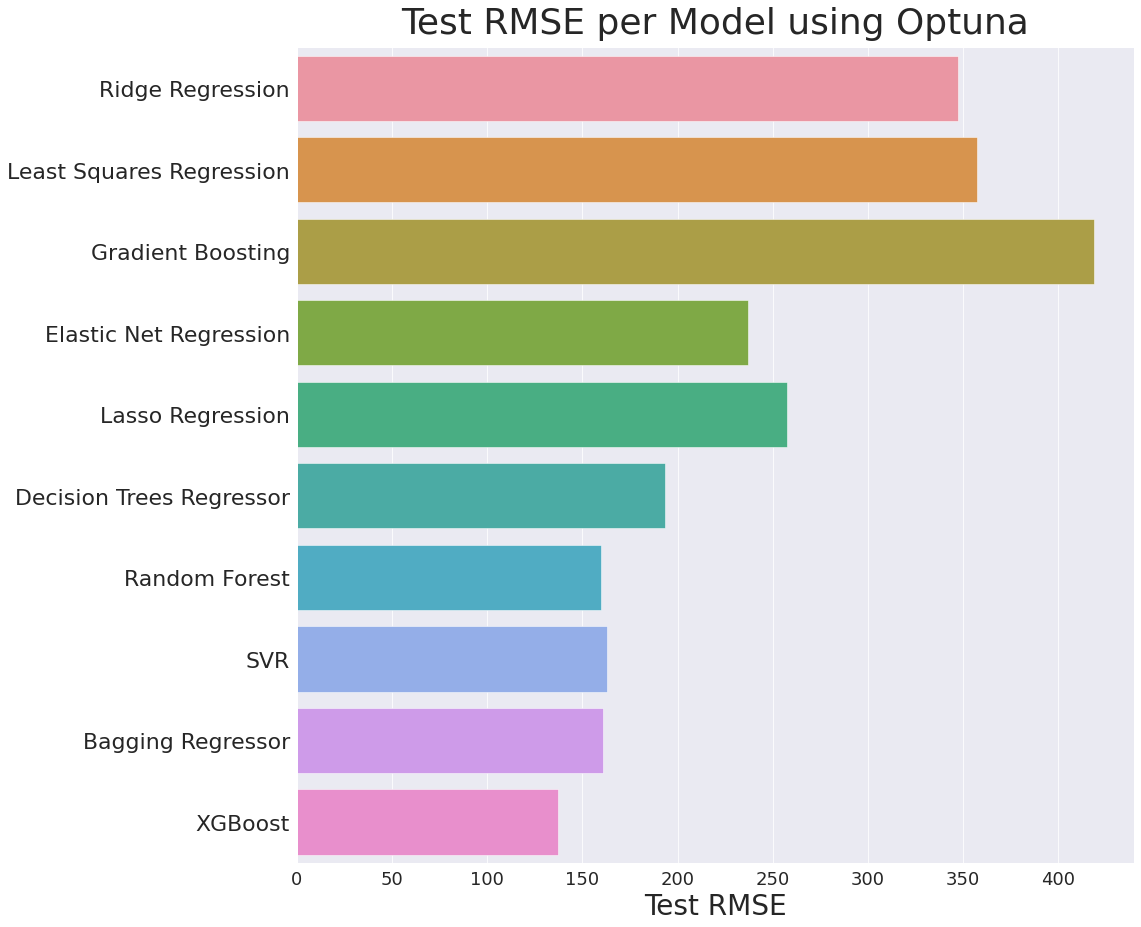

In [70]:
# Test RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Optuna Test RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test RMSE per Model using Optuna", size=36, y=1.01)
plt.xlabel("Test RMSE", size=28)
plt.savefig('rmsetestoptuna.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Final Model Decision

The **XGBoost model** returns us with the best accuracy on the Test Set using Optuna hyperparameter based on MSE and RMSE metrics. We use a the feature importance attribute to notice the importe of the *ENERGYSTARScore* and we can see that the variable scores 8th out of 47 variables which make it important in the decision of the model design. 